<a href="https://colab.research.google.com/github/BooEiEi/Predicting-Technology-Sector-Stock-Prices/blob/main/Model_Predict_Stock_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Downgrade sklearn version

In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install scikit-learn==1.2.2
!pip install shap==0.41.0
!pip show shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.41.0-cp311-cp311-linux_x86_64.whl size=518508 sha256=f2cf0fdffcfaee688527fa56dbdc5809f6341fff28dd5d2397f6f3995c817c97
  Stored in directory: /root/.cache/pip/wheels/2a/ca/9d/d8f6a34c245842f4ad8e5afb5e8f217b8914f6d957d9e302fd
Successfully built shap
  Attempting uninstall: slice

In [ ]:
import os
os._exit(00)

#DATA

In [ ]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF4'
path_Test = '/content/drive/My Drive/master project/data/DF_NEWV2'

Mounted at /content/drive


In [ ]:
!pip install scikeras

In [ ]:
import lightgbm
import sklearn
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
from scikeras.wrappers import KerasRegressor

In [ ]:
import tensorflow as tf
import sklearn
from xgboost import XGBRegressor, callback
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, InputLayer, GRU, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score
from xgboost import plot_importance
import copy

In [ ]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [ ]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])
df_META = df_META.sort_values('date').reset_index(drop=True)

In [ ]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])
df_AAPL = df_AAPL.sort_values('date').reset_index(drop=True)

In [ ]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])
df_MSFT = df_MSFT.sort_values('date').reset_index(drop=True)

In [ ]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])
df_NVDA = df_NVDA.sort_values('date').reset_index(drop=True)

In [ ]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])
df_GOOG = df_GOOG.sort_values('date').reset_index(drop=True)

#Normalized

In [ ]:
train_size = int(len(df_META) * 0.75)
test_size = len(df_META) - train_size

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_META = df_META.drop(columns=["Stockprice_META","date"])
y_META = df_META["Stockprice_META"]
X_META['has_news'] = X_META['sentiment_META'].apply(lambda x: 1 if x != 0.0 else 0)

In [ ]:
X_AAPL = df_AAPL.drop(columns=["Stockprice_AAPL","date"])
y_AAPL = df_AAPL["Stockprice_AAPL"]
X_AAPL['has_news'] = X_AAPL['sentiment_AAPL'].apply(lambda x: 1 if x != 0.0 else 0)

In [ ]:
X_GOOG = df_GOOG.drop(columns=["Stockprice_GOOGL","date"])
y_GOOG = df_GOOG["Stockprice_GOOGL"]
X_GOOG['has_news'] = X_GOOG['sentiment_GOOGL'].apply(lambda x: 1 if x != 0.0 else 0)

In [ ]:
X_NVDA = df_NVDA.drop(columns=["Stockprice_NVDA","date"])
y_NVDA = df_NVDA["Stockprice_NVDA"]
X_NVDA['has_news'] = X_NVDA['sentiment_NVDA'].apply(lambda x: 1 if x != 0.0 else 0)

In [ ]:
X_MSFT = df_MSFT.drop(columns=["Stockprice_MSFT","date"])
y_MSFT = df_MSFT["Stockprice_MSFT"]
X_MSFT['has_news'] = X_MSFT['sentiment_MSFT'].apply(lambda x: 1 if x != 0.0 else 0)

In [ ]:
Xtrain_META, XTest_META = X_META.iloc[:train_size], X_META.iloc[train_size:] # ข้อมูล train
ytrain_META, yTest_META = y_META.iloc[:train_size], y_META.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_AAPL, XTest_AAPL = X_AAPL.iloc[:train_size], X_AAPL.iloc[train_size:] # ข้อมูล train
ytrain_AAPL, yTest_AAPL = y_AAPL.iloc[:train_size], y_AAPL.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_GOOG, XTest_GOOG = X_GOOG.iloc[:train_size], X_GOOG.iloc[train_size:] # ข้อมูล train
ytrain_GOOG, yTest_GOOG = y_GOOG.iloc[:train_size], y_GOOG.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_MSFT, XTest_MSFT = X_MSFT.iloc[:train_size], X_MSFT.iloc[train_size:] # ข้อมูล train
ytrain_MSFT, yTest_MSFT = y_MSFT.iloc[:train_size], y_MSFT.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_NVDA, XTest_NVDA = X_NVDA.iloc[:train_size], X_NVDA.iloc[train_size:] # ข้อมูล train
ytrain_NVDA, yTest_NVDA = y_NVDA.iloc[:train_size], y_NVDA.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_META = scaler.fit_transform(Xtrain_META)
XTest_META =  scaler.transform(XTest_META)

In [ ]:
Xtrain_AAPL = scaler.fit_transform(Xtrain_AAPL)
XTest_AAPL = scaler.transform(XTest_AAPL)

In [ ]:
Xtrain_GOOG = scaler.fit_transform(Xtrain_GOOG)
XTest_GOOG = scaler.transform(XTest_GOOG)

In [ ]:
Xtrain_MSFT = scaler.fit_transform(Xtrain_MSFT)
XTest_MSFT = scaler.transform(XTest_MSFT)

In [ ]:
Xtrain_NVDA = scaler.fit_transform(Xtrain_NVDA)
XTest_NVDA = scaler.transform(XTest_NVDA)

In [ ]:
date_test = df_META['date'].iloc[train_size:]

#Lightgbm

In [ ]:
from lightgbm import plot_importance

In [ ]:
def model_lightgbm(X_train, y_train, X_test, y_test, feature_fraction, learning_rate,
                    max_bin, max_depth, min_data_in_leaf, n_estimators,
                   date_test, date_train, feature_names, label_name='Dataset'):

    params = {
    'feature_fraction': feature_fraction,
    'learning_rate': learning_rate ,
    'max_bin': max_bin,
    'max_depth': max_depth,
    'min_data_in_leaf': min_data_in_leaf,
    'n_estimators': n_estimators,
    }
    model = LGBMRegressor(**params, verbosity=-1, n_jobs=-1,random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              eval_metric='mse',
              callbacks=[early_stopping(stopping_rounds=50)])
    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # ===== Test Metrics =====
    y_pred = model.predict(X_test)

    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE Test:      {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
        'date': date_test,
        'actual': y_test,
        'prediction': y_pred
    })


    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

    from IPython.display import display
    display(eli5.show_weights(perm, feature_names=list(feature_names)))

    return model


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##META

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	valid_0's l2: 9599.74
-----------------------------
Train
R2 Value Train:  0.9976
MSE Train:       32.5142
RMSE Train:      5.7021
MAE Train:       3.9917
MAPE Train:      0.0174
-----------------------------


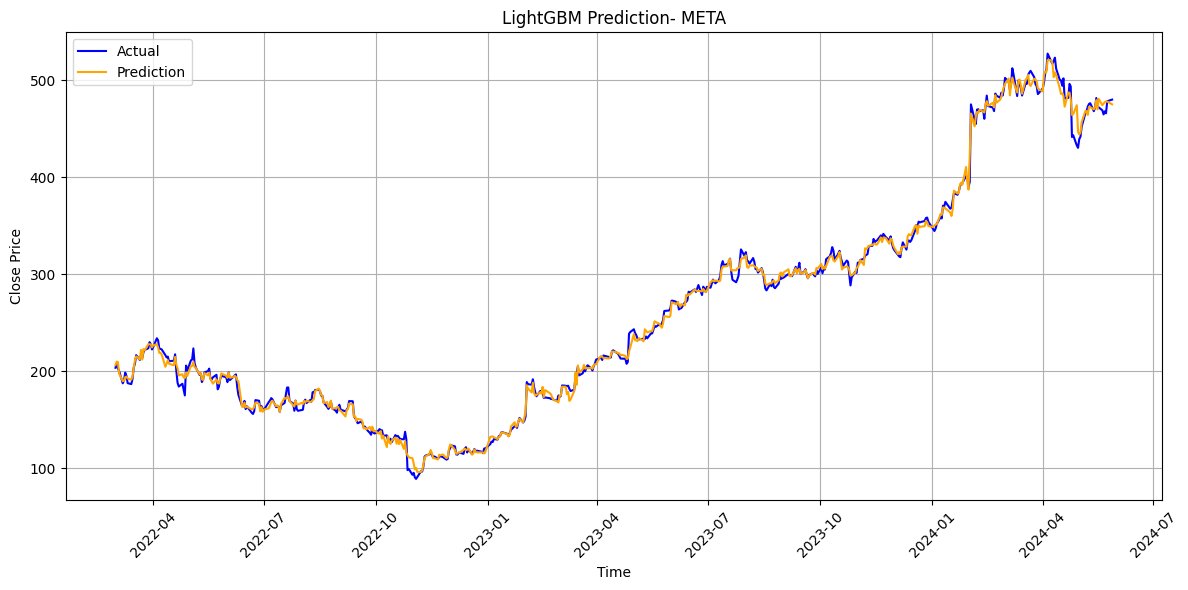

-----------------------------
Test
R2 Value Test:  -1.1656
MSE Test:       9599.7397
RMSE Test:      5.7021
MAE Test:       79.0521
MAPE Test:      0.1299
-----------------------------


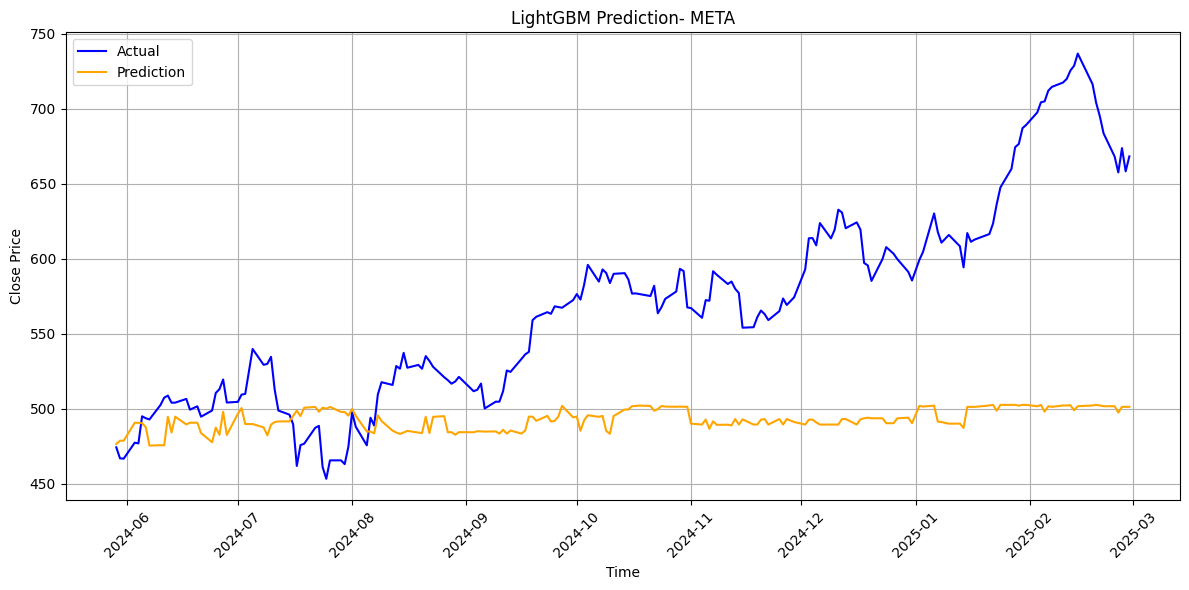

LGBMRegressor(feature_fraction=0.9, learning_rate=0.2, max_bin=150, max_depth=3,
              min_data_in_leaf=25, n_estimators=600, n_jobs=-1, random_state=42,
              verbosity=-1)

In [ ]:
model_lightgbm(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    feature_fraction=0.9,
    learning_rate=0.2,
    max_bin=150,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META',
    feature_names= X_META.columns)

##AAPL

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's l2: 2040.83
-----------------------------
Train
R2 Value Train:  0.9857
MSE Train:       4.6839
RMSE Train:      2.1642
MAE Train:       1.6401
MAPE Train:      0.0099
-----------------------------


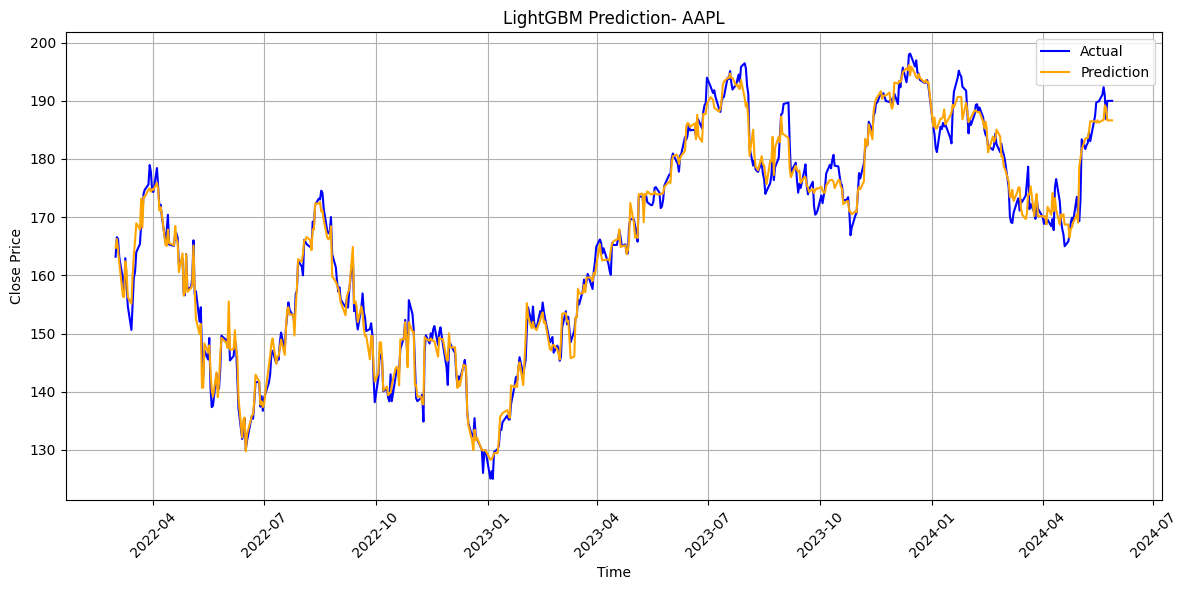

-----------------------------
Test
R2 Value Test:  -10.4760
MSE Test:       2040.8284
RMSE Test:      2.1642
MAE Test:       43.4929
MAPE Test:      0.1883
-----------------------------


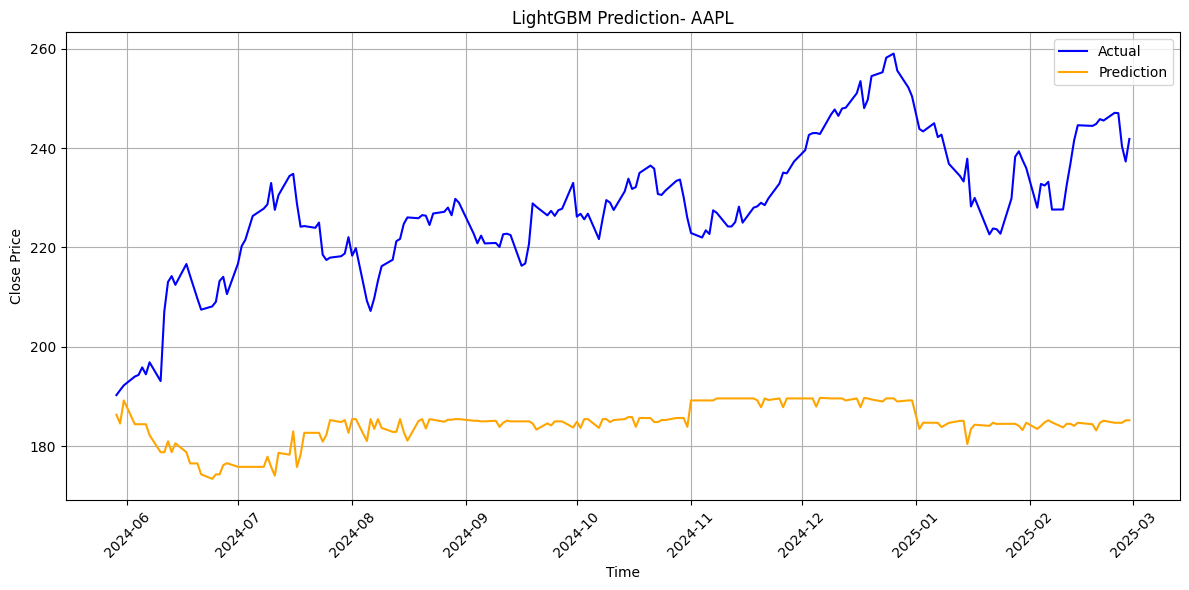

LGBMRegressor(feature_fraction=0.7, learning_rate=0.2, max_bin=200, max_depth=3,
              min_data_in_leaf=25, n_estimators=600, n_jobs=-1, random_state=42,
              verbosity=-1)

In [ ]:
model_lightgbm(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    feature_fraction=0.7,
    learning_rate=0.2,
    max_bin=200,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL',
    feature_names= X_AAPL.columns)

##MSFT

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	valid_0's l2: 842.705
-----------------------------
Train
R2 Value Train:  0.9968
MSE Train:       11.3011
RMSE Train:      3.3617
MAE Train:       2.6153
MAPE Train:      0.0087
-----------------------------


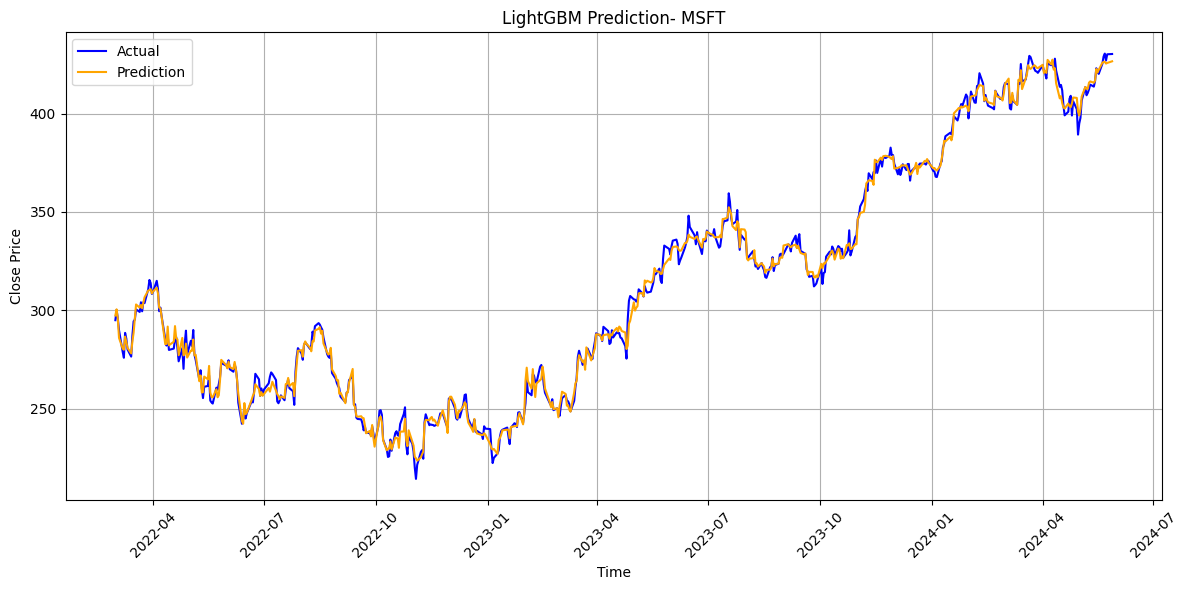

-----------------------------
Test
R2 Value Test:  -2.4642
MSE Test:       842.7052
RMSE Test:      3.3617
MAE Test:       24.9004
MAPE Test:      0.0576
-----------------------------


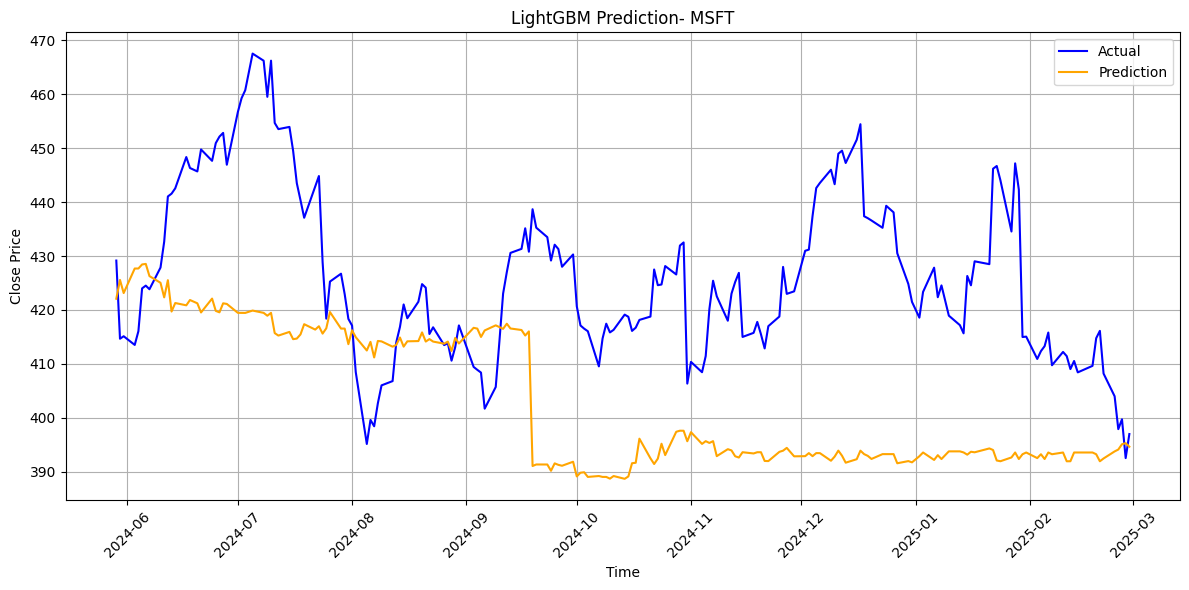

LGBMRegressor(feature_fraction=0.6, learning_rate=0.2, max_bin=100, max_depth=3,
              min_data_in_leaf=25, n_estimators=600, n_jobs=-1, random_state=42,
              verbosity=-1)

In [ ]:
model_lightgbm(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    feature_fraction=0.6,
    learning_rate=0.2,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT',
    feature_names= X_MSFT.columns)

##NVDA

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	valid_0's l2: 1307.27
-----------------------------
Train
R2 Value Train:  0.9978
MSE Train:       1.2190
RMSE Train:      1.1041
MAE Train:       0.7421
MAPE Train:      0.0229
-----------------------------


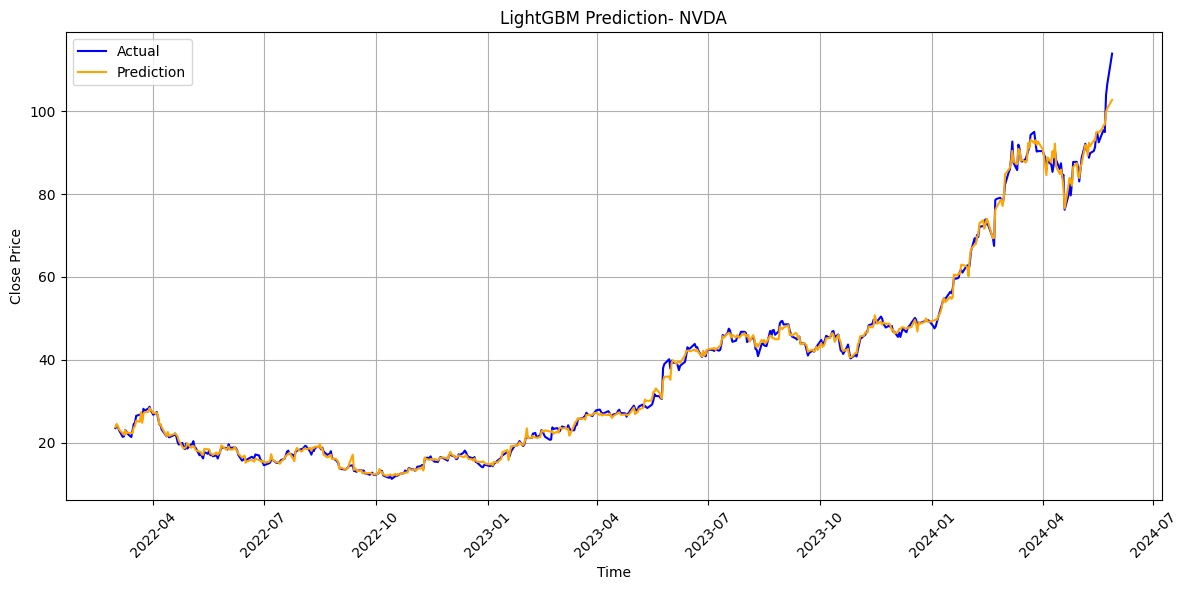

-----------------------------
Test
R2 Value Test:  -8.7463
MSE Test:       1307.2657
RMSE Test:      1.1041
MAE Test:       34.6175
MAPE Test:      0.2643
-----------------------------


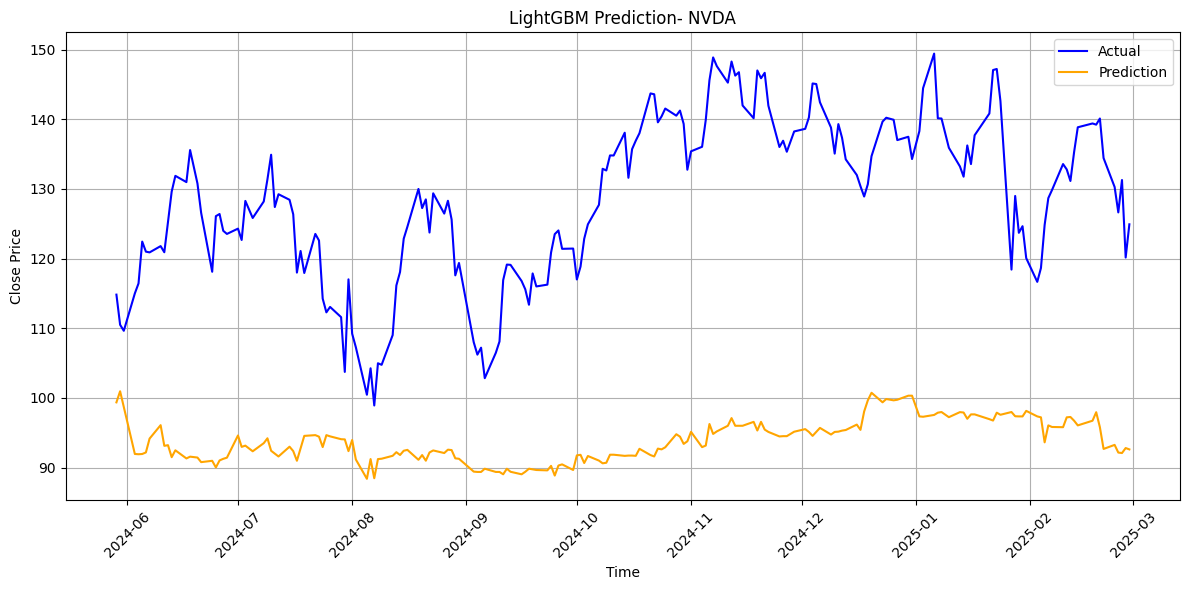

LGBMRegressor(feature_fraction=0.5, max_bin=100, max_depth=3,
              min_data_in_leaf=25, n_estimators=600, n_jobs=-1, random_state=42,
              verbosity=-1)

In [ ]:
model_lightgbm(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    feature_fraction=0.5,
    learning_rate=0.1,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA',
    feature_names= X_NVDA.columns)

##GOOG

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's l2: 324.303
-----------------------------
Train
R2 Value Train:  0.9797
MSE Train:       8.6557
RMSE Train:      2.9421
MAE Train:       2.3359
MAPE Train:      0.0195
-----------------------------


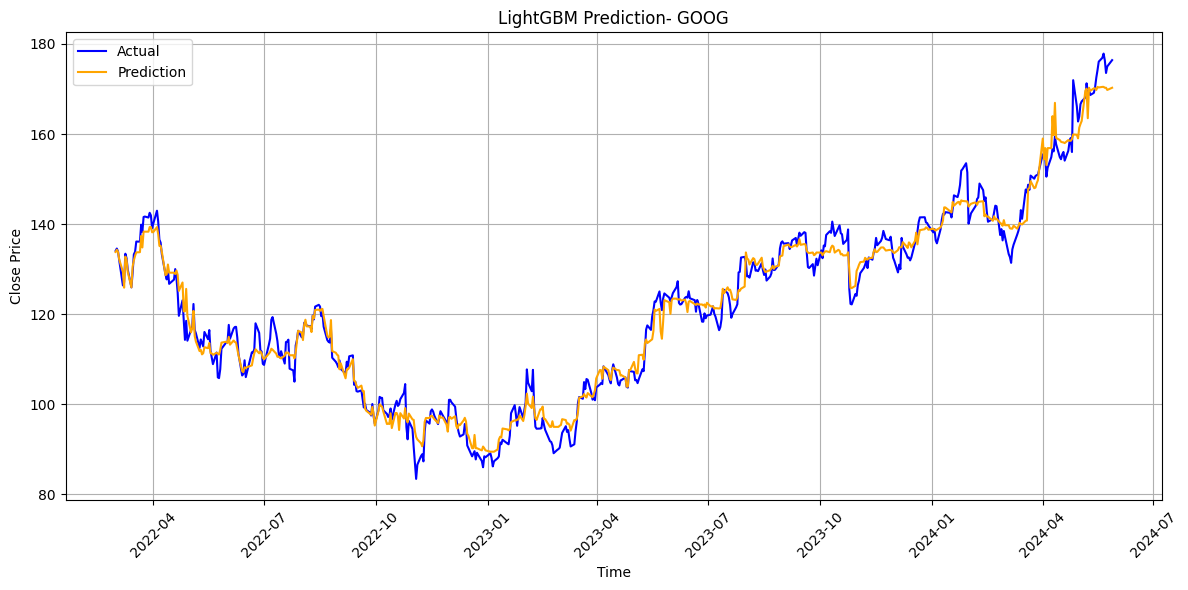

-----------------------------
Test
R2 Value Test:  -0.9961
MSE Test:       324.3032
RMSE Test:      2.9421
MAE Test:       14.3038
MAPE Test:      0.0776
-----------------------------


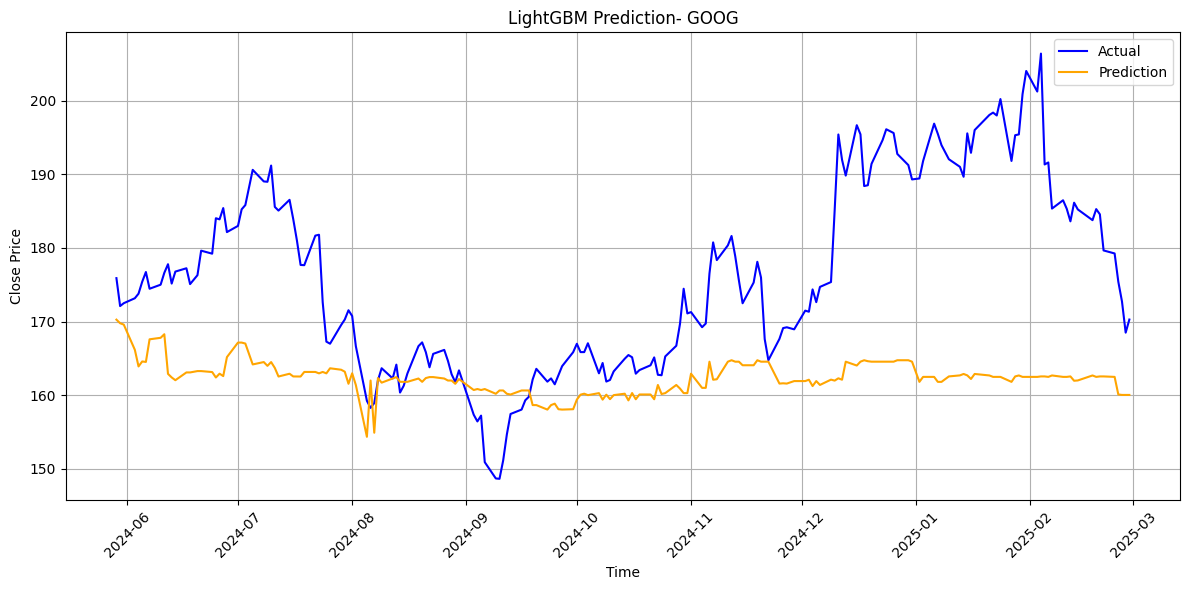

LGBMRegressor(feature_fraction=0.5, max_bin=100, max_depth=3,
              min_data_in_leaf=25, n_jobs=-1, random_state=42, verbosity=-1)

In [ ]:
model_lightgbm(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    feature_fraction=0.5,
    learning_rate=0.1,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=100,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG',
    feature_names= X_GOOG.columns)

#XGBoost

In [ ]:
from xgboost import plot_importance

In [ ]:
def model_XGBoost(X_train, y_train, X_test, y_test, learning_rate, max_depth,
                   alpha, reg_lambda, n_estimators, min_child_weight, colsample_bytree,
                   date_test, date_train, feature_names, label_name='Dataset'):

    params = {
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': alpha,
        'reg_lambda' : reg_lambda,
        'n_estimators' : n_estimators,
        'min_child_weight' : min_child_weight,
        'colsample_bytree' : colsample_bytree,
    }
    model = XGBRegressor(**params, early_stopping_rounds = 50)
    model.fit(X_train, y_train ,
                eval_set=[(X_test, y_test)],
                verbose=False)

    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'XGBoost Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })

    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

    from IPython.display import display
    display(eli5.show_weights(perm, feature_names=list(feature_names)))

    df_result.to_csv(os.path.join(path_Test,f'df_XGB_{label_name}.csv'))
    return model

##META

-----------------------------
Train
R2 Value Train:  0.9961
MSE Train:       52.8424
RMSE Train:      7.2693
MAE Train:       5.5138
MAPE Train:      0.0260
-----------------------------


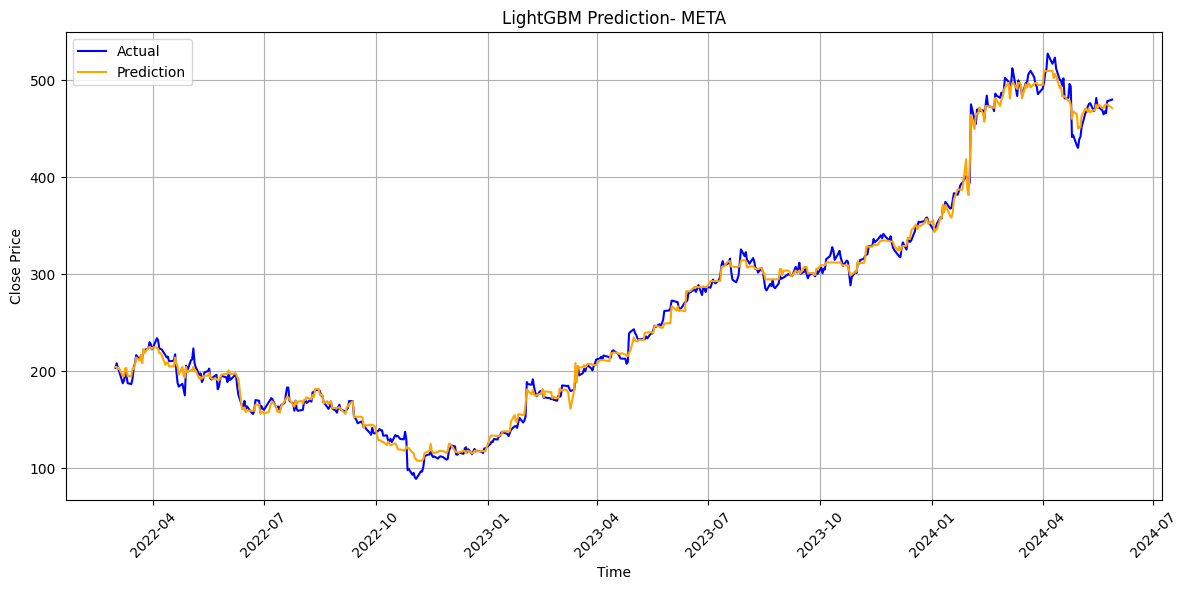

-----------------------------
Test
R2 Value Test:  -1.5992
MSE Test:       11521.5325
RMSE Test:      107.3384
MAE Test:       89.7530
MAPE:           0.1485
-----------------------------


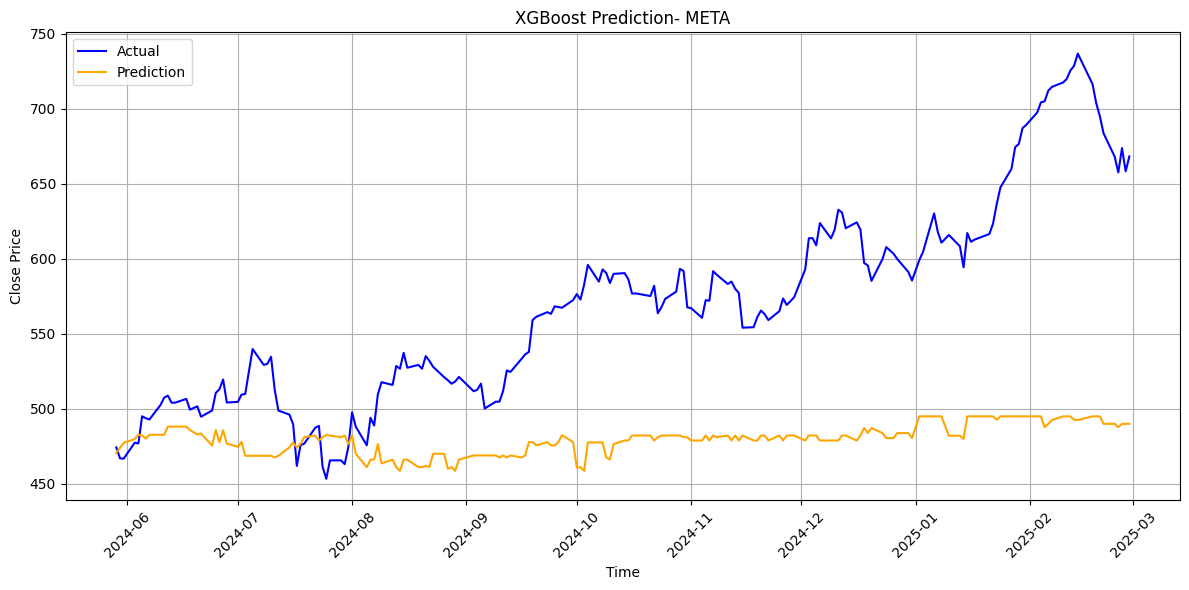

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model_XGBoost(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META',
    feature_names= X_META.columns)

##AAPL

-----------------------------
Train
R2 Value Train:  0.9834
MSE Train:       5.4286
RMSE Train:      2.3299
MAE Train:       1.8131
MAPE Train:      0.0109
-----------------------------


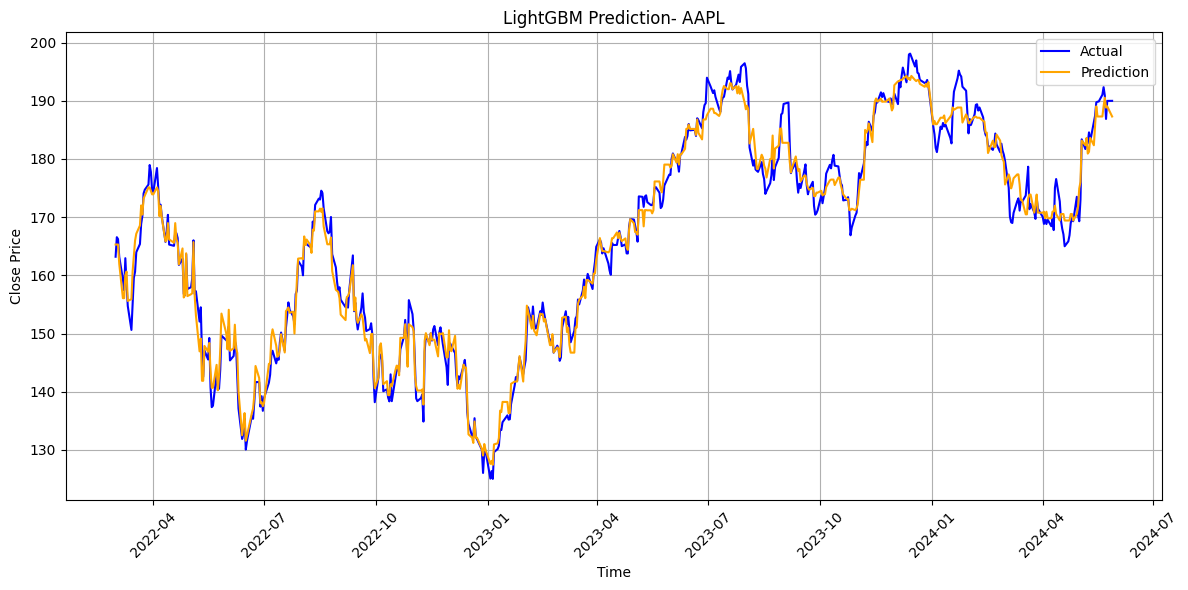

-----------------------------
Test
R2 Value Test:  -9.7526
MSE Test:       1912.1879
RMSE Test:      43.7286
MAE Test:       41.9582
MAPE:           0.1815
-----------------------------


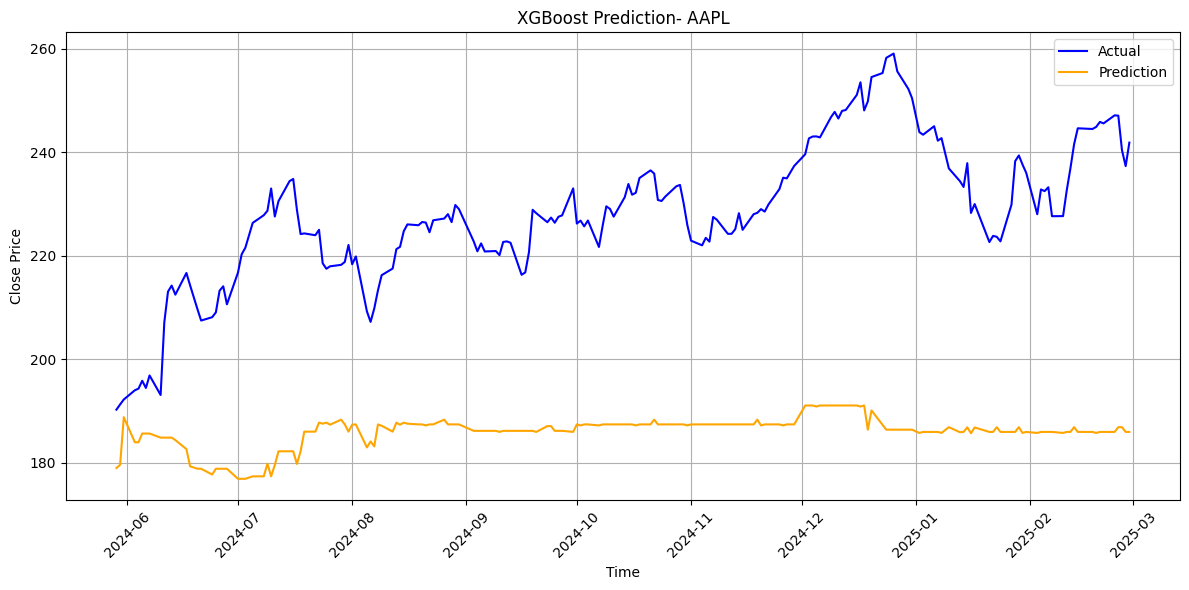

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model_XGBoost(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 1,
    n_estimators = 200,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL',
    feature_names= X_AAPL.columns)

##MSFT

-----------------------------
Train
R2 Value Train:  0.9966
MSE Train:       12.3521
RMSE Train:      3.5146
MAE Train:       2.7402
MAPE Train:      0.0090
-----------------------------


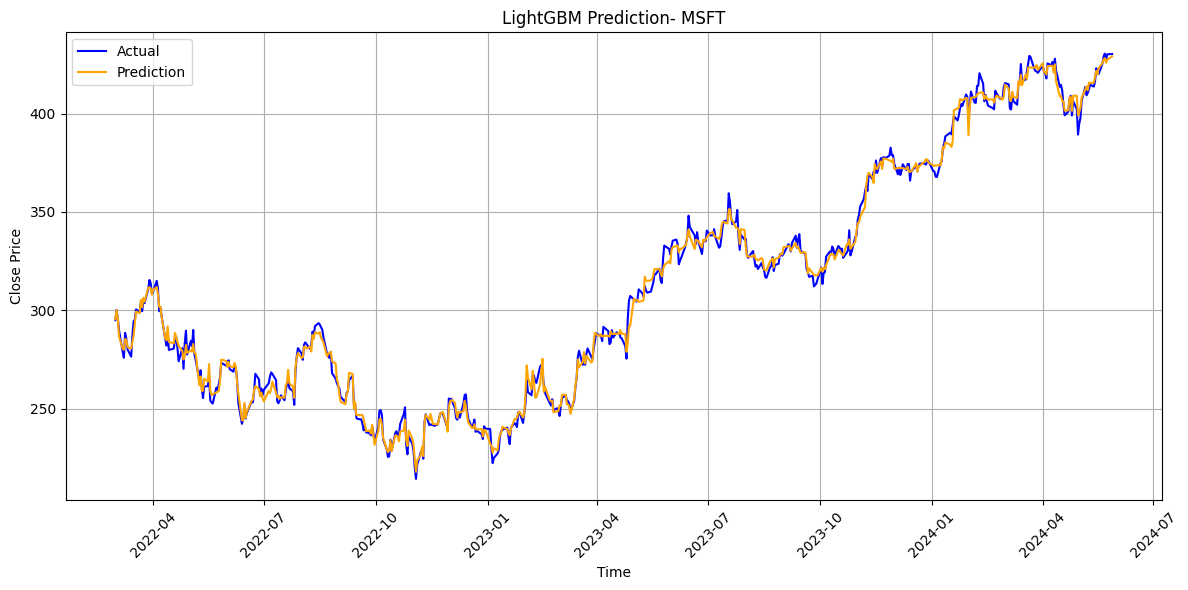

-----------------------------
Test
R2 Value Test:  0.0206
MSE Test:       238.2485
RMSE Test:      15.4353
MAE Test:       12.2786
MAPE:           0.0285
-----------------------------


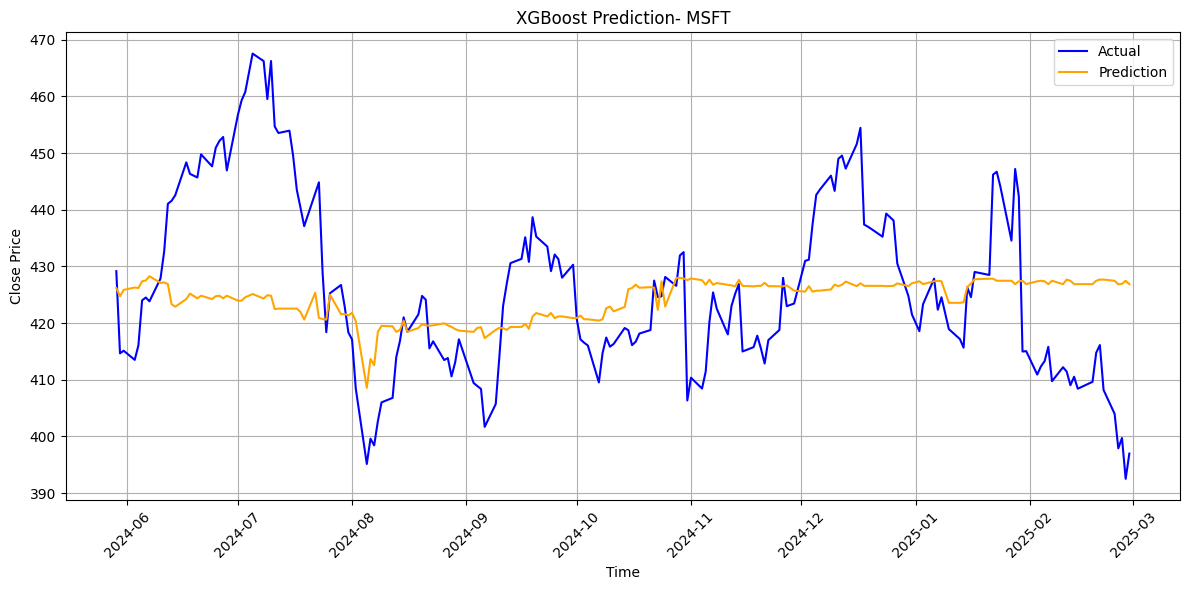

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model_XGBoost(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT',
    feature_names= X_MSFT.columns)

##NVDA

-----------------------------
Train
R2 Value Train:  0.9981
MSE Train:       1.0702
RMSE Train:      1.0345
MAE Train:       0.7730
MAPE Train:      0.0250
-----------------------------


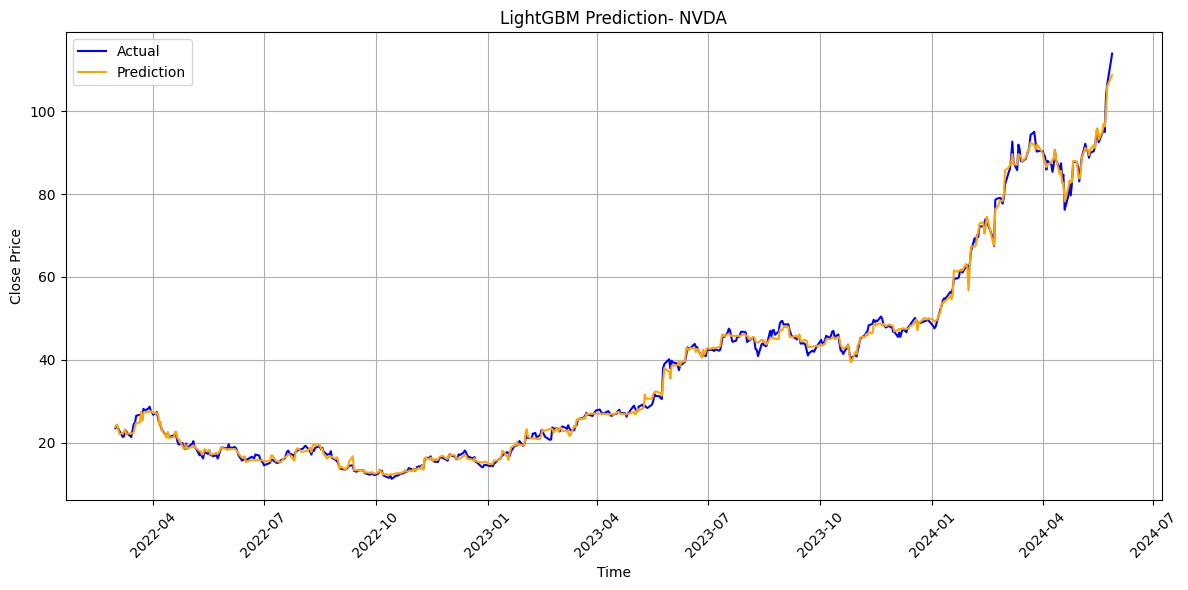

-----------------------------
Test
R2 Value Test:  -6.3852
MSE Test:       990.5727
RMSE Test:      31.4734
MAE Test:       29.6176
MAPE:           0.2250
-----------------------------


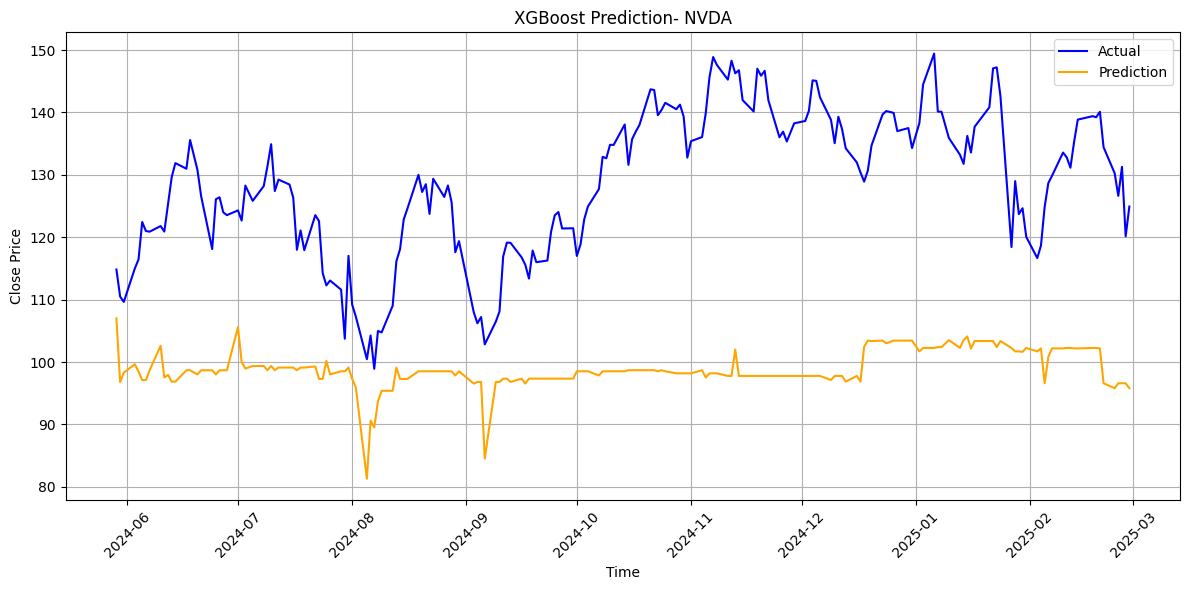

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model_XGBoost(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.5,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA',
    feature_names= X_NVDA.columns)

##GOOG

-----------------------------
Train
R2 Value Train:  0.9898
MSE Train:       4.3434
RMSE Train:      2.0841
MAE Train:       1.6217
MAPE Train:      0.0135
-----------------------------


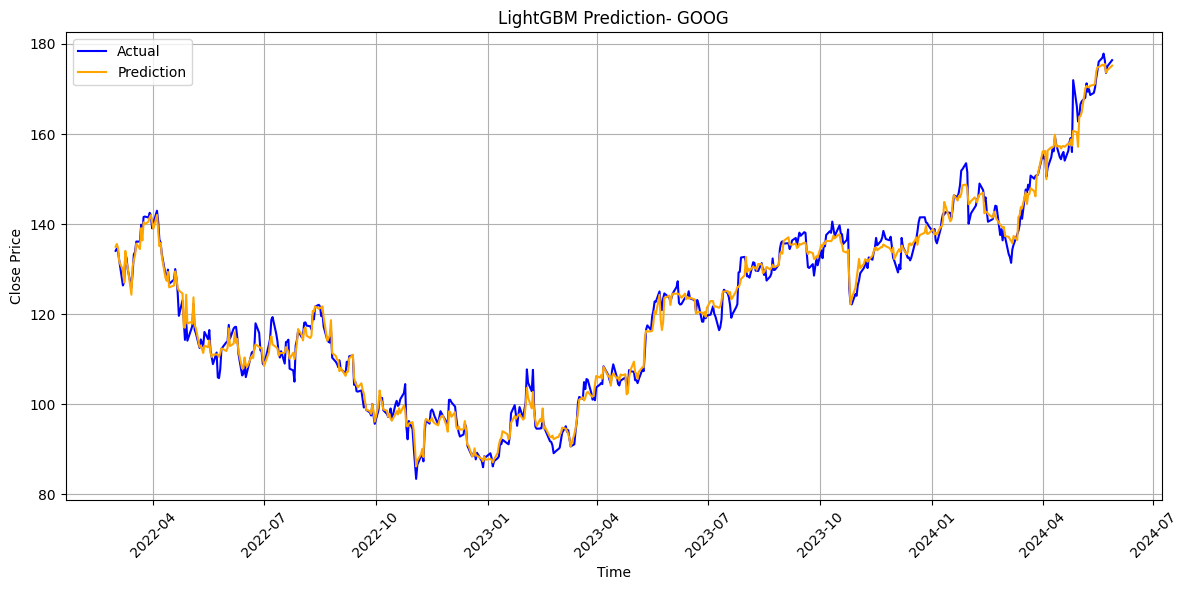

-----------------------------
Test
R2 Value Test:  -0.8187
MSE Test:       295.4830
RMSE Test:      17.1896
MAE Test:       13.8089
MAPE:           0.0751
-----------------------------


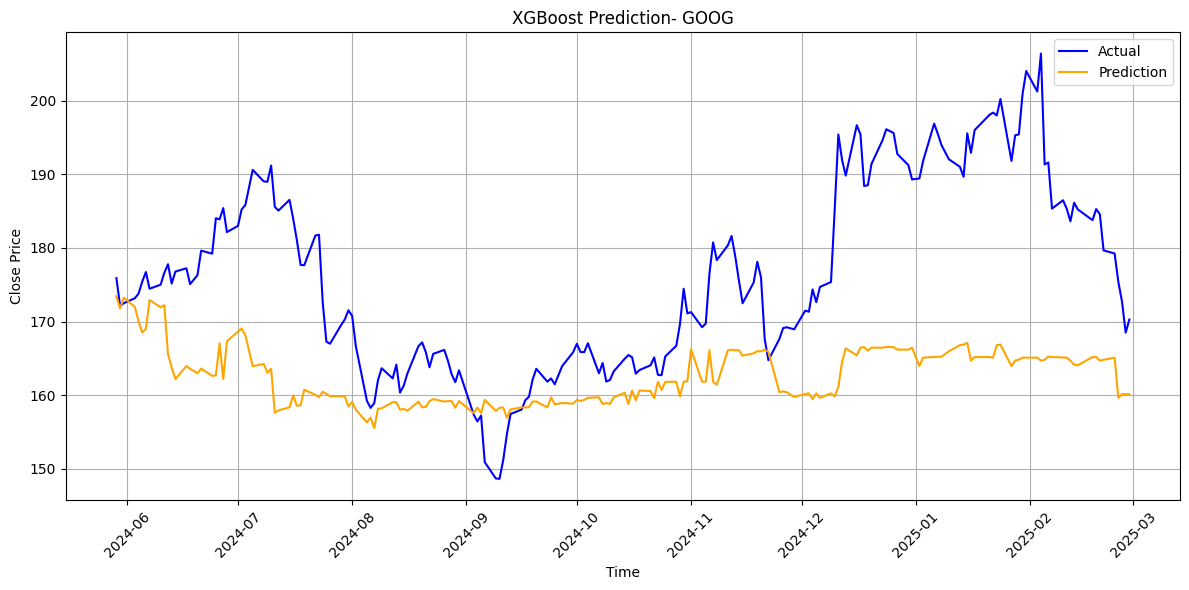

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model_XGBoost(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 1,
    n_estimators = 600,
    min_child_weight = 3,
    colsample_bytree = 0.3,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG',
    feature_names= X_GOOG.columns)

#RNN

In [ ]:
look_back = 10

Xtrain_META1, ytrain_META1, = [], []
for i in range(len(Xtrain_META) - look_back):
    Xtrain_META1.append(Xtrain_META[i:i + look_back])
    ytrain_META1.append(ytrain_META[i + look_back])

Xtrain_META1, ytrain_META1 = np.array(Xtrain_META1), np.array(ytrain_META1)

In [ ]:
print(Xtrain_META1.shape)
print(ytrain_META1.shape)

(554, 10, 15)
(554,)


In [ ]:
XTest_META1, yTest_META1, = [], []
for i in range(len(XTest_META) - look_back):
    XTest_META1.append(XTest_META[i:i + look_back])
    yTest_META1.append(yTest_META.iloc[i + look_back])

XTest_META1, yTest_META1 = np.array(XTest_META1), np.array(yTest_META1)

In [ ]:
print(XTest_META1.shape)
print(yTest_META1.shape)

(179, 10, 15)
(179,)


In [ ]:
Xtrain_AAPL1, ytrain_AAPL1 = [], []
for i in range(len(Xtrain_AAPL) - look_back):
    Xtrain_AAPL1.append(Xtrain_AAPL[i:i + look_back])
    ytrain_AAPL1.append(ytrain_AAPL[i + look_back])

Xtrain_AAPL1, ytrain_AAPL1 = np.array(Xtrain_AAPL1), np.array(ytrain_AAPL1)

In [ ]:
XTest_AAPL1, yTest_AAPL1, = [], []
for i in range(len(XTest_AAPL) - look_back):
    XTest_AAPL1.append(XTest_AAPL[i:i + look_back])
    yTest_AAPL1.append(yTest_AAPL.iloc[i + look_back])

XTest_AAPL1, yTest_AAPL1 = np.array(XTest_AAPL1), np.array(yTest_AAPL1)

In [ ]:
print(Xtrain_AAPL1.shape)
print(ytrain_AAPL1.shape)
print(XTest_AAPL1.shape)
print(yTest_AAPL1.shape)

(554, 10, 15)
(554,)
(179, 10, 15)
(179,)


In [ ]:
Xtrain_MSFT1, ytrain_MSFT1 = [], []
for i in range(len(Xtrain_MSFT) - look_back):
    Xtrain_MSFT1.append(Xtrain_MSFT[i:i + look_back])
    ytrain_MSFT1.append(ytrain_MSFT[i + look_back])

Xtrain_MSFT1, ytrain_MSFT1 = np.array(Xtrain_MSFT1), np.array(ytrain_MSFT1)

In [ ]:
XTest_MSFT1, yTest_MSFT1, = [], []
for i in range(len(XTest_MSFT) - look_back):
    XTest_MSFT1.append(XTest_MSFT[i:i + look_back])
    yTest_MSFT1.append(yTest_MSFT.iloc[i + look_back])

XTest_MSFT1, yTest_MSFT1 = np.array(XTest_MSFT1), np.array(yTest_MSFT1)

In [ ]:
print(Xtrain_MSFT1.shape)
print(ytrain_MSFT1.shape)
print(XTest_MSFT1.shape)
print(yTest_MSFT1.shape)

(554, 10, 15)
(554,)
(179, 10, 15)
(179,)


In [ ]:
Xtrain_NVDA1, ytrain_NVDA1 = [], []
for i in range(len(Xtrain_NVDA) - look_back):
    Xtrain_NVDA1.append(Xtrain_NVDA[i:i + look_back])
    ytrain_NVDA1.append(ytrain_NVDA[i + look_back])

Xtrain_NVDA1, ytrain_NVDA1 = np.array(Xtrain_NVDA1), np.array(ytrain_NVDA1)

In [ ]:
XTest_NVDA1, yTest_NVDA1, = [], []
for i in range(len(XTest_NVDA) - look_back):
    XTest_NVDA1.append(XTest_NVDA[i:i + look_back])
    yTest_NVDA1.append(yTest_NVDA.iloc[i + look_back])

XTest_NVDA1, yTest_NVDA1 = np.array(XTest_NVDA1), np.array(yTest_NVDA1)

In [ ]:
print(Xtrain_NVDA1.shape)
print(ytrain_NVDA1.shape)
print(XTest_NVDA1.shape)
print(yTest_NVDA1.shape)

(554, 10, 15)
(554,)
(179, 10, 15)
(179,)


In [ ]:
Xtrain_GOOG1, ytrain_GOOG1 = [], []
for i in range(len(Xtrain_GOOG) - look_back):
    Xtrain_GOOG1.append(Xtrain_GOOG[i:i + look_back])
    ytrain_GOOG1.append(ytrain_GOOG[i + look_back])

Xtrain_GOOG1, ytrain_GOOG1 = np.array(Xtrain_GOOG1), np.array(ytrain_GOOG1)

In [ ]:
XTest_GOOG1, yTest_GOOG1, = [], []
for i in range(len(XTest_GOOG) - look_back):
    XTest_GOOG1.append(XTest_GOOG[i:i + look_back])
    yTest_GOOG1.append(yTest_GOOG.iloc[i + look_back])

XTest_GOOG1, yTest_GOOG1 = np.array(XTest_GOOG1), np.array(yTest_GOOG1)

In [ ]:
print(Xtrain_GOOG1.shape)
print(ytrain_GOOG1.shape)
print(XTest_GOOG1.shape)
print(yTest_GOOG1.shape)

(554, 10, 15)
(554,)
(179, 10, 15)
(179,)


##Model

In [ ]:
    import shap
    import numpy as np

In [ ]:
def model_RNN(X_train, y_train, X_test, y_test, batch_size, epochs,
            optimizer, date_test, date_train, feature_names, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(SimpleRNN(128, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])


    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'RNN Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_RNN_{label_name}.csv'))

    def permutation_feature_importance_3d(model, X_test, y_test, feature_names=None):

        n_features1 = X_test.shape[2]
        baseline_preds = model.predict(X_test)
        baseline_score = mean_absolute_error(y_test, baseline_preds)

        importances = []

        for i in range(n_features1):
            X_permuted = copy.deepcopy(X_test)
            # สุ่ม permute ไปที่ feature i ทุก timestep
            for t in range(X_permuted.shape[1]):
                np.random.shuffle(X_permuted[:, t, i])  # สุ่มค่าของ feature ที่ i ที่ timestep t

            permuted_preds = model.predict(X_permuted)
            permuted_score = mean_absolute_error(y_test, permuted_preds)
            importance = permuted_score - baseline_score
            importances.append(importance)

        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(n_features1)]

        # สร้าง DataFrame สำหรับแสดงผล
        import pandas as pd
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)

        return importance_df
    importance_df = permutation_feature_importance_3d(model, X_test, y_test, feature_names)
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.title('Permutation Feature Importance')
    plt.tight_layout()
    plt.show()


    return model, importance_df

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9853
MSE Train:       200.5167
RMSE Train:      14.1604
MAE Train:       11.3187
MAPE Train:      0.0484
-----------------------------


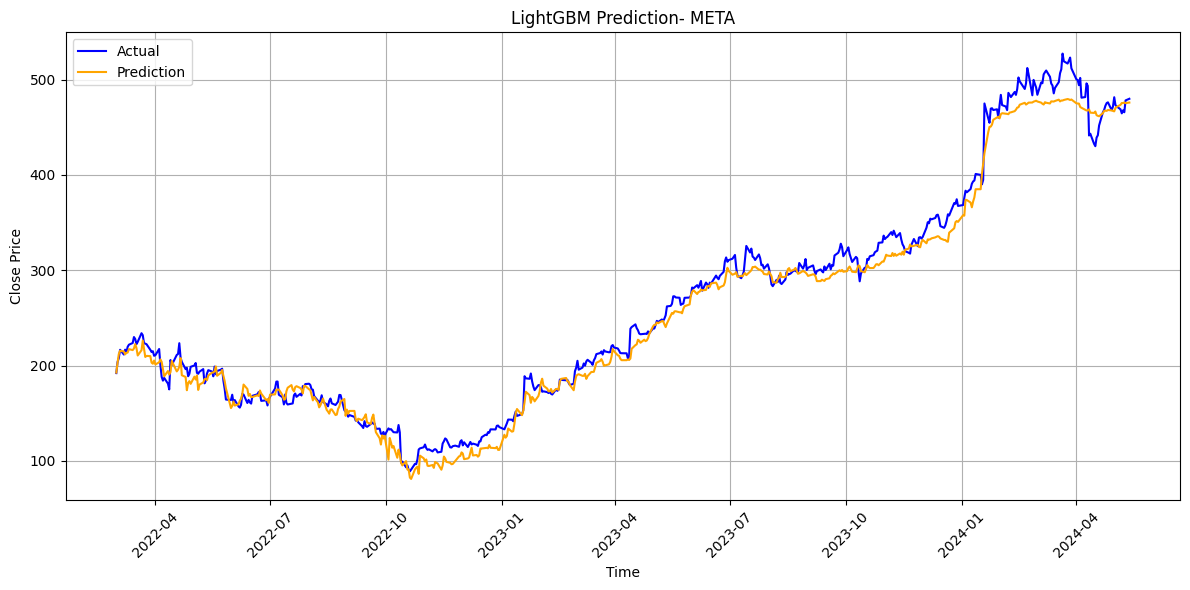

-----------------------------
Test
R2 Value Test:  -1.6255
MSE Test:       11206.7702
RMSE Test:      105.8620
MAE Test:       87.7123
MAPE:           0.1439
-----------------------------


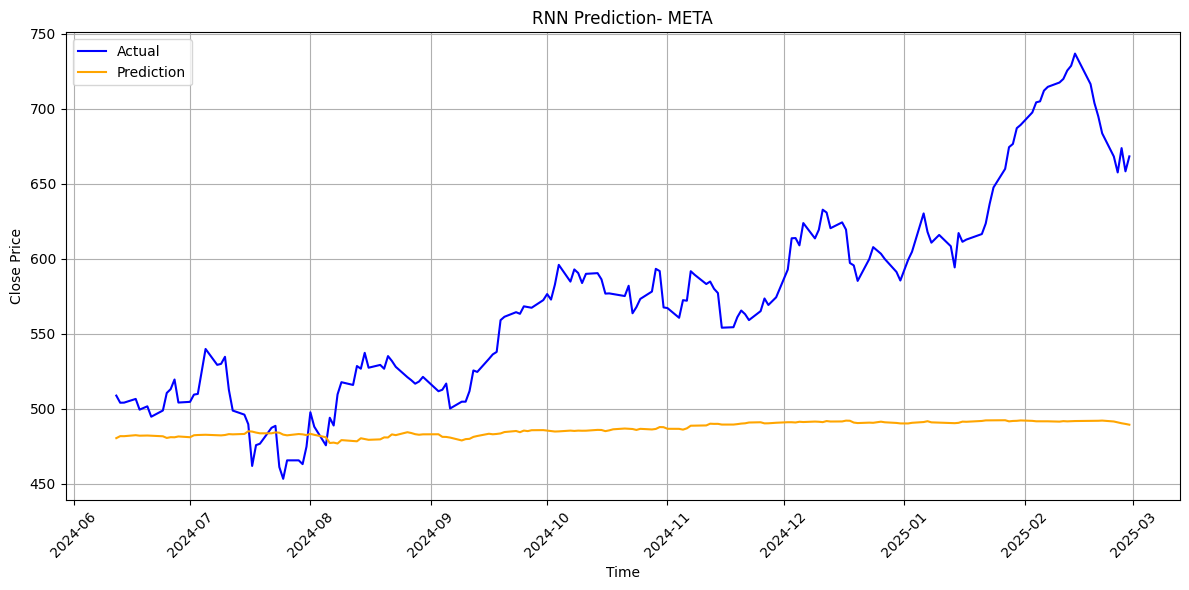

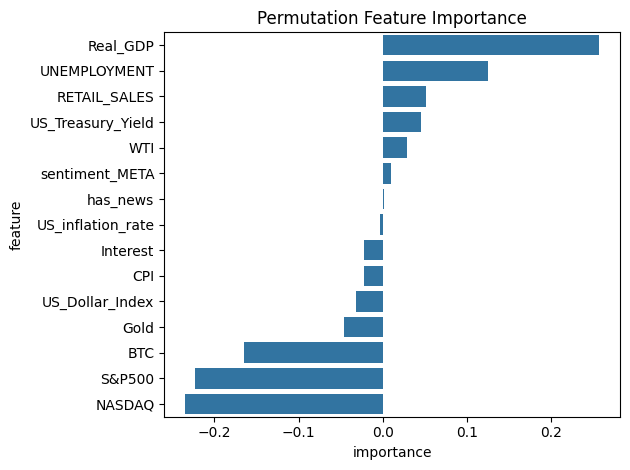

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7da07f56dee0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 7            Real_GDP    0.257462
 2        UNEMPLOYMENT    0.125054
 5        RETAIL_SALES    0.051846
 4   US_Treasury_Yield    0.045009
 11                WTI    0.029297
 0      sentiment_META    0.009587
 14           has_news    0.001342
 6   US_inflation_rate   -0.003049
 1            Interest   -0.021929
 3                 CPI   -0.022640
 8     US_Dollar_Index   -0.031454
 13               Gold   -0.046256
 12                BTC   -0.165343
 9              S&P500   -0.222834
 10             NASDAQ   -0.235117)

In [ ]:
model_RNN(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 32,
    epochs = 300,
    optimizer = 'RMSprop',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META',
    feature_names= X_META.columns)

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.7448
MSE Train:       84.7274
RMSE Train:      9.2047
MAE Train:       7.7413
MAPE Train:      0.0484
-----------------------------


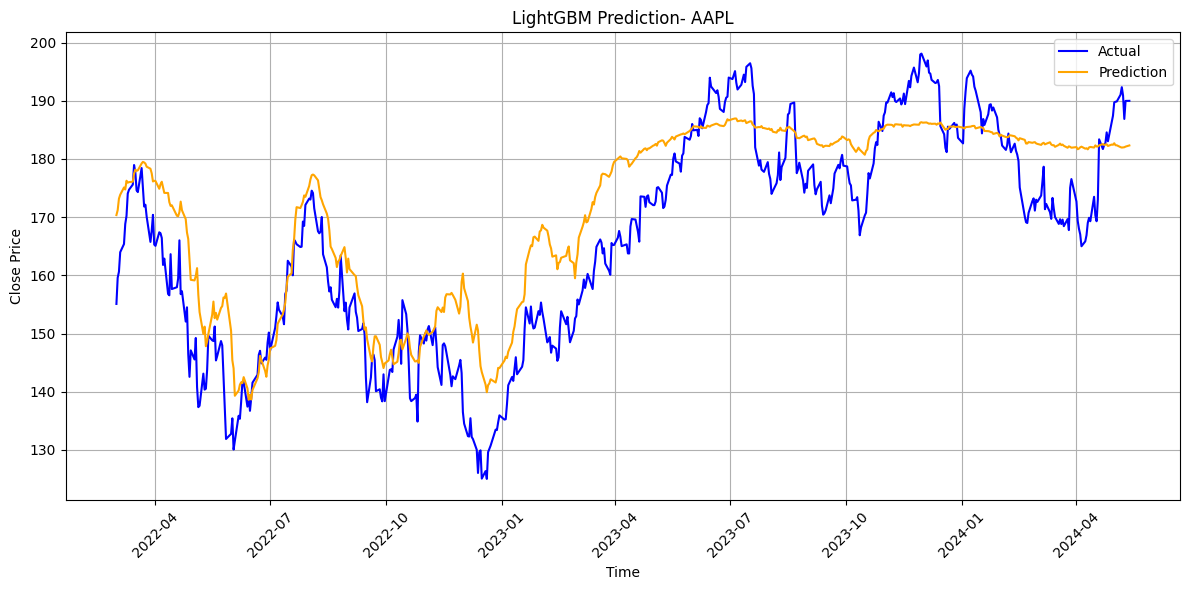

-----------------------------
Test
R2 Value Test:  -19.3565
MSE Test:       2489.6672
RMSE Test:      49.8966
MAE Test:       48.5218
MAPE:           0.2092
-----------------------------


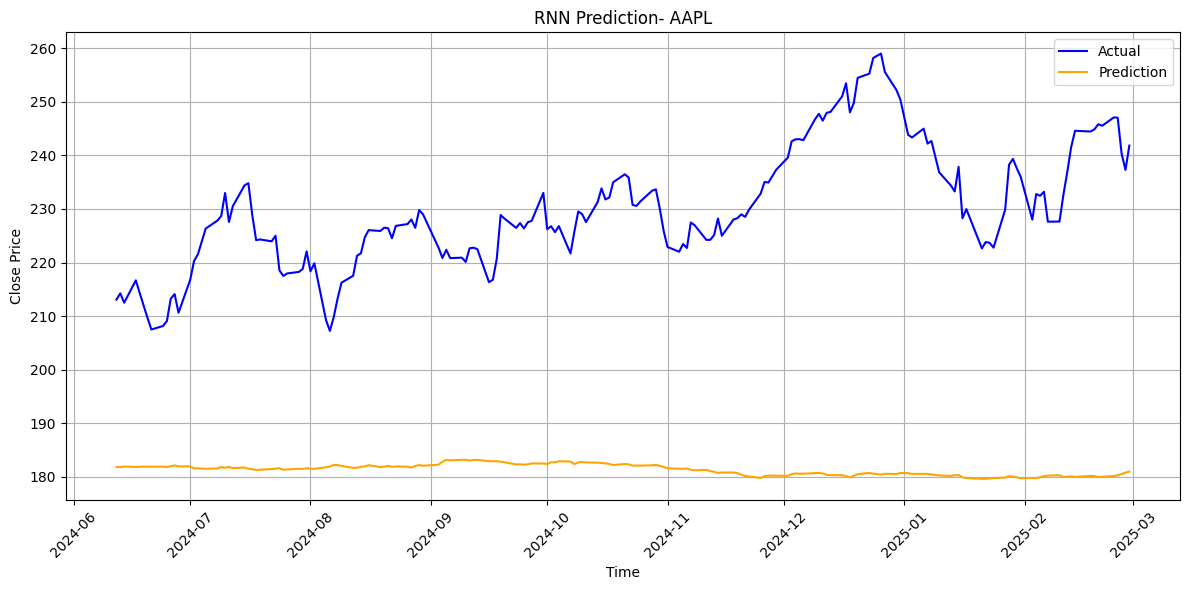

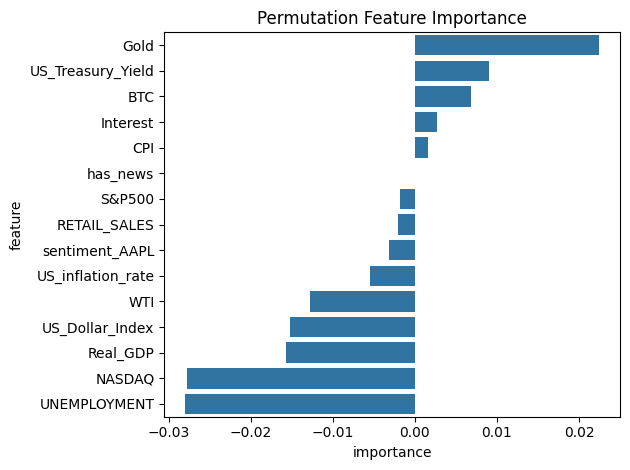

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7da07826d800>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=250
 ),
               feature  importance
 13               Gold    0.022477
 4   US_Treasury_Yield    0.009004
 12                BTC    0.006852
 1            Interest    0.002658
 3                 CPI    0.001611
 14           has_news    0.000000
 9              S&P500   -0.001861
 5        RETAIL_SALES   -0.002103
 0      sentiment_AAPL   -0.003193
 6   US_inflation_rate   -0.005498
 11                WTI   -0.012760
 8     US_Dollar_Index   -0.015170
 7            Real_GDP   -0.015733
 10             NASDAQ   -0.027825
 2        UNEMPLOYMENT   -0.028024)

In [ ]:
model_RNN(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 32,
    epochs = 250,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL',
    feature_names= X_AAPL.columns)

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9729
MSE Train:       98.4802
RMSE Train:      9.9237
MAE Train:       8.0164
MAPE Train:      0.0258
-----------------------------


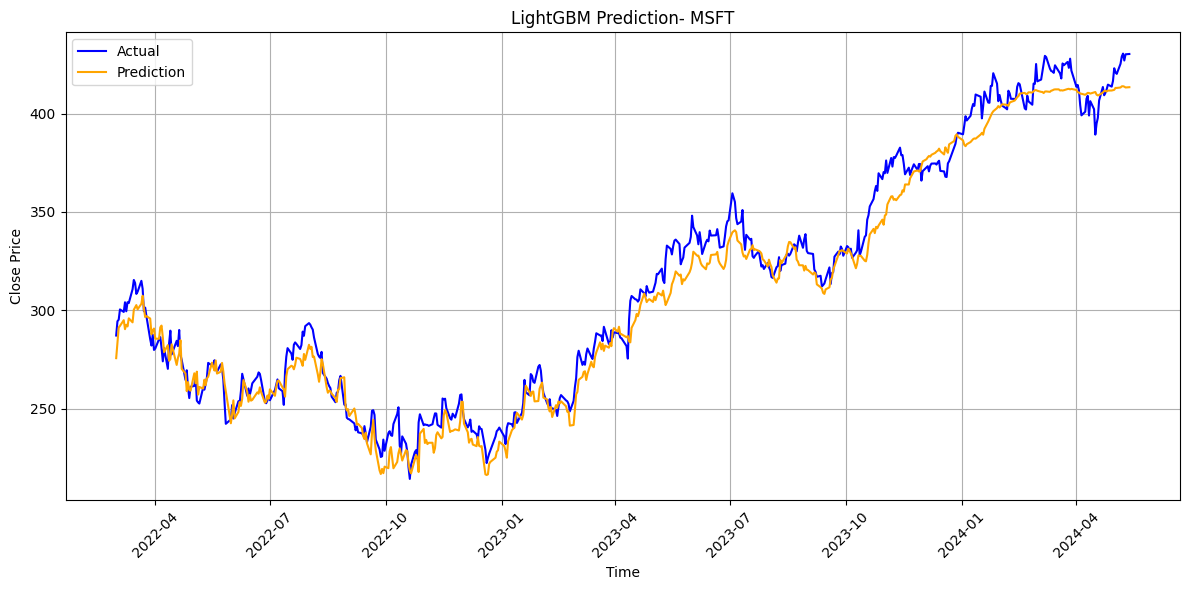

-----------------------------
Test
R2 Value Test:  -0.4062
MSE Test:       356.5966
RMSE Test:      18.8838
MAE Test:       14.0696
MAPE:           0.0322
-----------------------------


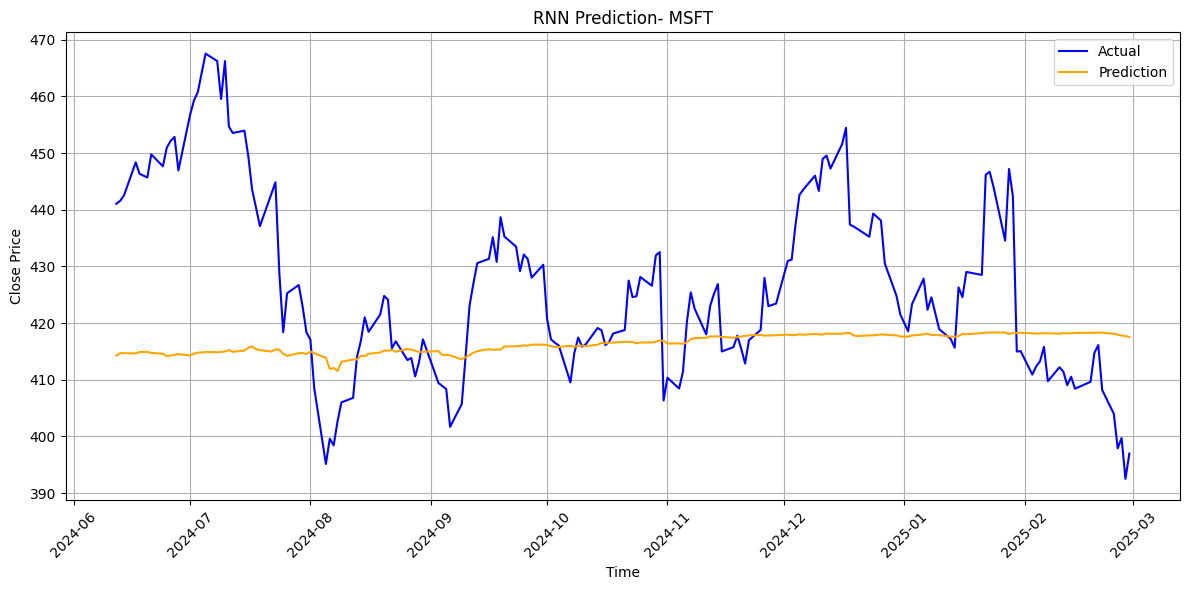

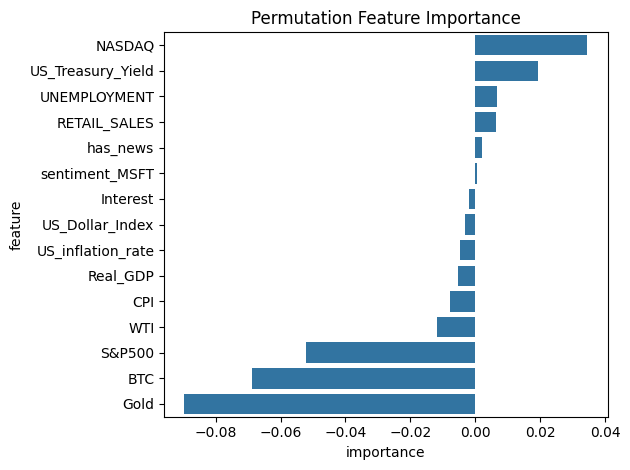

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7da07ed08220>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
               feature  importance
 10             NASDAQ    0.034595
 4   US_Treasury_Yield    0.019324
 2        UNEMPLOYMENT    0.006580
 5        RETAIL_SALES    0.006425
 14           has_news    0.002002
 0      sentiment_MSFT    0.000475
 1            Interest   -0.001824
 8     US_Dollar_Index   -0.003072
 6   US_inflation_rate   -0.004811
 7            Real_GDP   -0.005272
 3                 CPI   -0.007674
 11                WTI   -0.011917
 9              S&P500   -0.052204
 12                BTC   -0.068865
 13               Gold   -0.089664)

In [ ]:
model_RNN(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT',
    feature_names= X_MSFT.columns)

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9916
MSE Train:       4.7644
RMSE Train:      2.1828
MAE Train:       1.3668
MAPE Train:      0.0384
-----------------------------


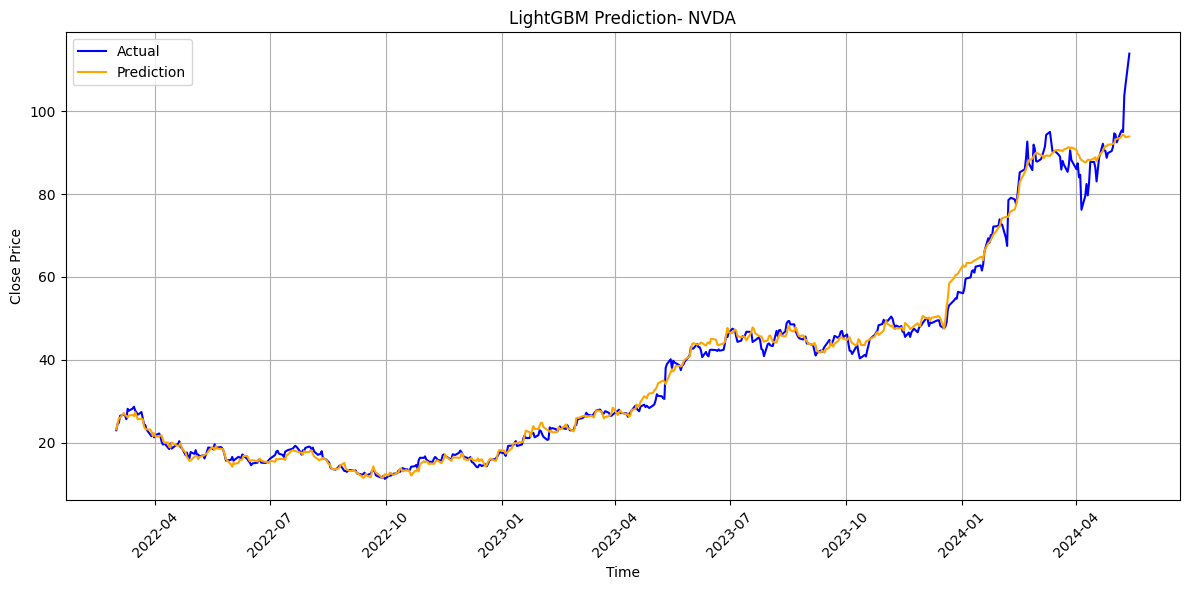

-----------------------------
Test
R2 Value Test:  -7.3793
MSE Test:       1116.3336
RMSE Test:      33.4116
MAE Test:       31.7813
MAPE:           0.2408
-----------------------------


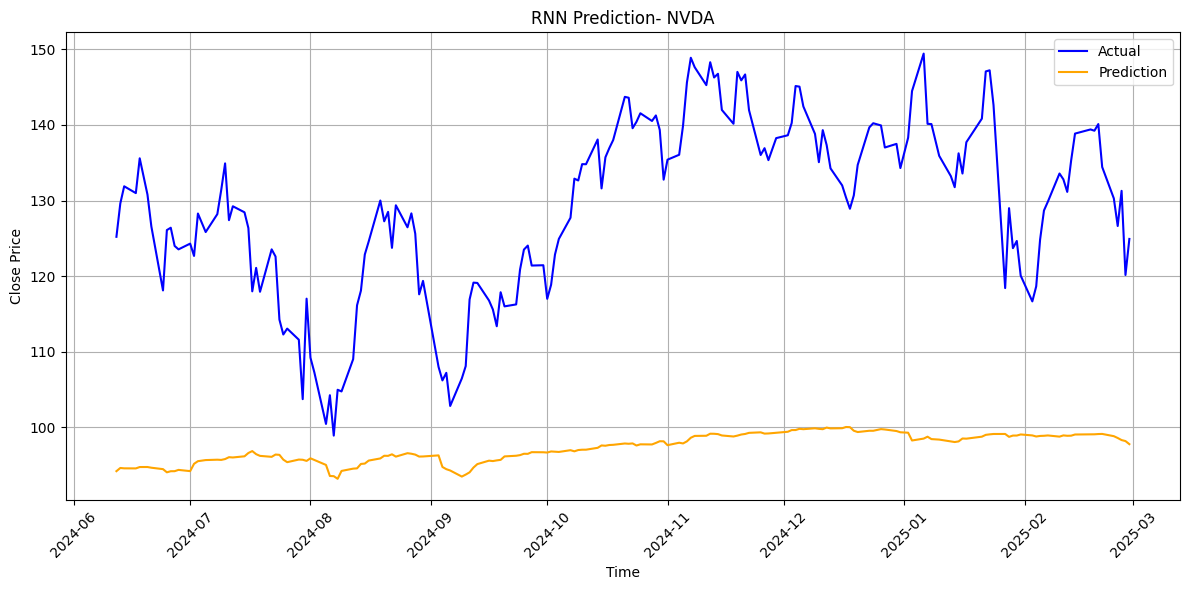

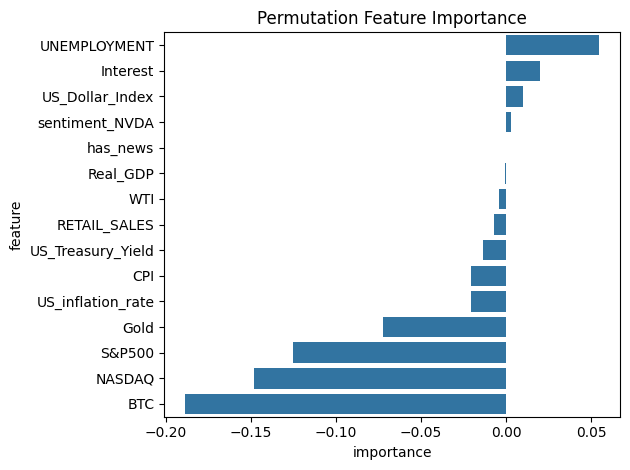

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7da08196f6a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
               feature  importance
 2        UNEMPLOYMENT    0.054898
 1            Interest    0.020238
 8     US_Dollar_Index    0.009943
 0      sentiment_NVDA    0.003195
 14           has_news    0.000000
 7            Real_GDP   -0.000497
 11                WTI   -0.004177
 5        RETAIL_SALES   -0.007124
 4   US_Treasury_Yield   -0.013272
 3                 CPI   -0.020671
 6   US_inflation_rate   -0.020776
 13               Gold   -0.072450
 9              S&P500   -0.125127
 10             NASDAQ   -0.148449
 12                BTC   -0.188940)

In [ ]:
model_RNN(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'Adam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA',
    feature_names= X_NVDA.columns)

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9183
MSE Train:       35.3304
RMSE Train:      5.9439
MAE Train:       4.1440
MAPE Train:      0.0322
-----------------------------


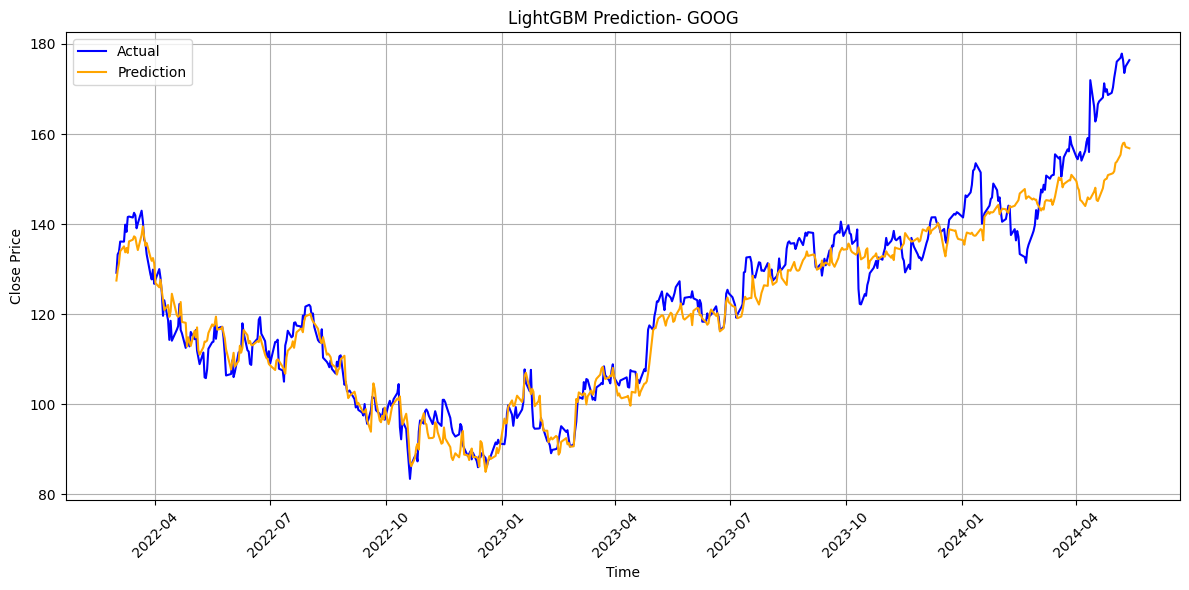

-----------------------------
Test
R2 Value Test:  -0.0104
MSE Test:       173.0883
RMSE Test:      13.1563
MAE Test:       10.4465
MAPE:           0.0571
-----------------------------


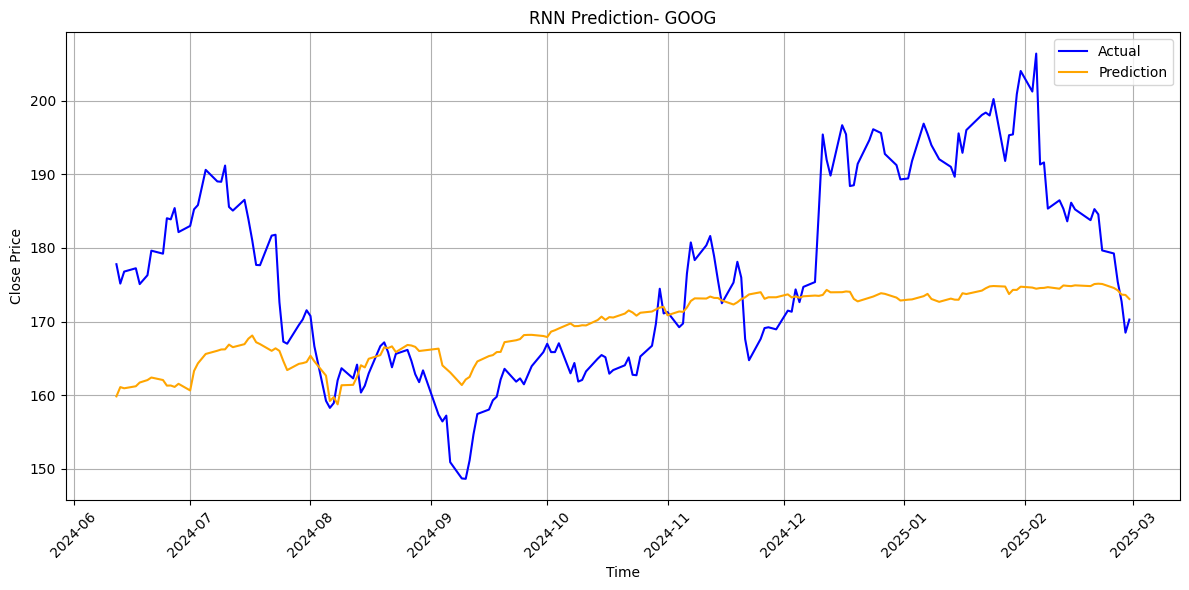

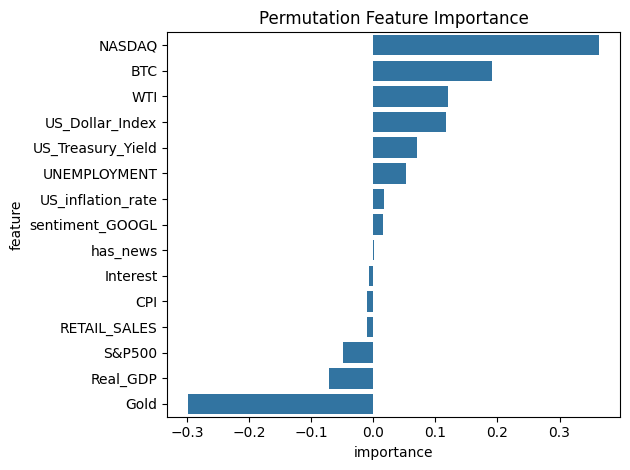

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x7da07064f1a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 10             NASDAQ    0.364281
 12                BTC    0.191852
 11                WTI    0.119770
 8     US_Dollar_Index    0.116995
 4   US_Treasury_Yield    0.070189
 2        UNEMPLOYMENT    0.052158
 6   US_inflation_rate    0.016608
 0     sentiment_GOOGL    0.015503
 14           has_news    0.001172
 1            Interest   -0.006226
 3                 CPI   -0.009681
 5        RETAIL_SALES   -0.010314
 9              S&P500   -0.048975
 7            Real_GDP   -0.071494
 13               Gold   -0.298765)

In [ ]:
model_RNN(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 32,
    epochs = 300,
    optimizer = 'RMSprop',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG',
    feature_names= X_GOOG.columns)

#GRU

In [ ]:
def model_GRU(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, feature_names, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(GRU(128, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model


    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])


        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE Test:      {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'GRU Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

    from IPython.display import display
    display(eli5.show_weights(perm, feature_names=list(feature_names)))

    return model

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9931
MSE Train:       94.2293
RMSE Train:      9.7072
MAE Train:       7.2179
MAPE Train:      0.0313
-----------------------------


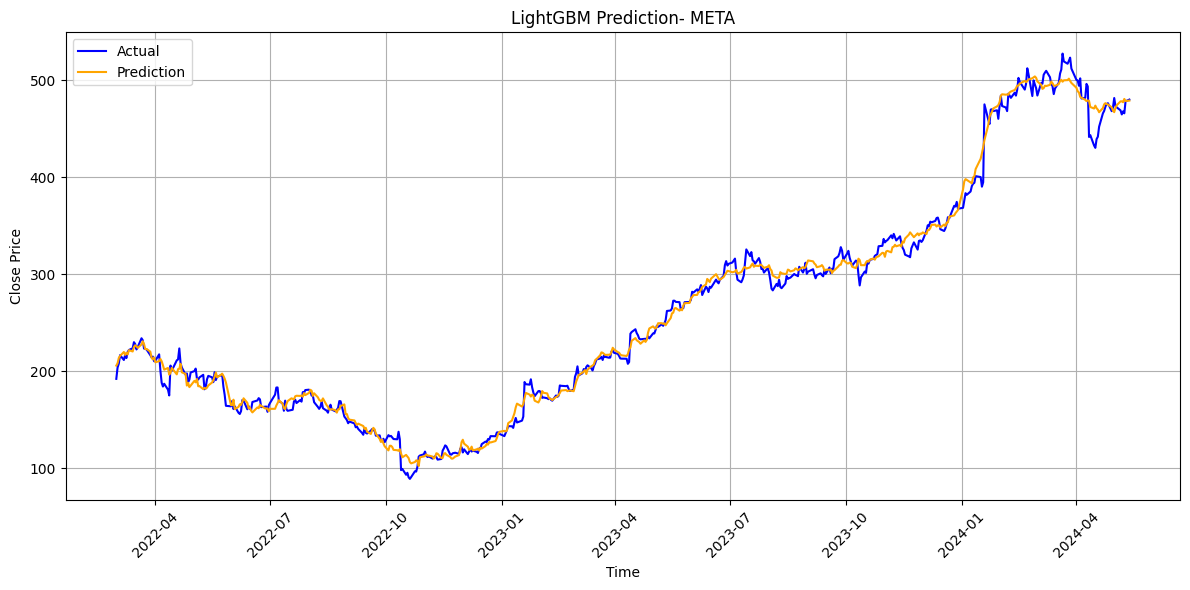

-----------------------------
Test
R2 Value Test:  -1.0055
MSE Test:       8560.5345
RMSE Test:      92.5232
MAE Test:       75.2969
MAPE Test:      0.1233
-----------------------------


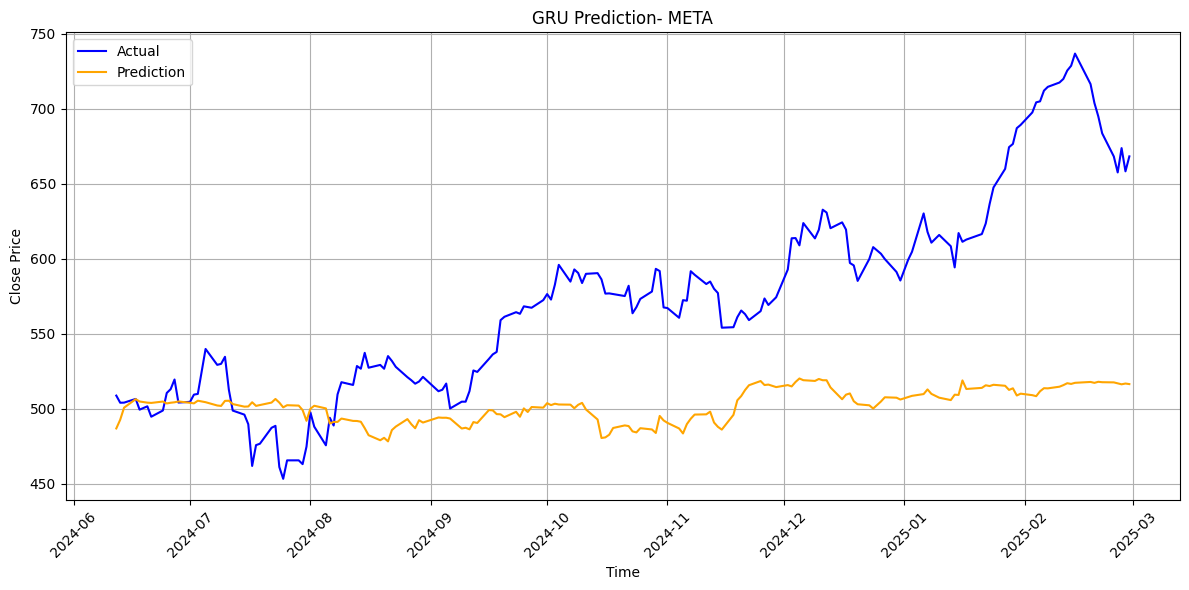

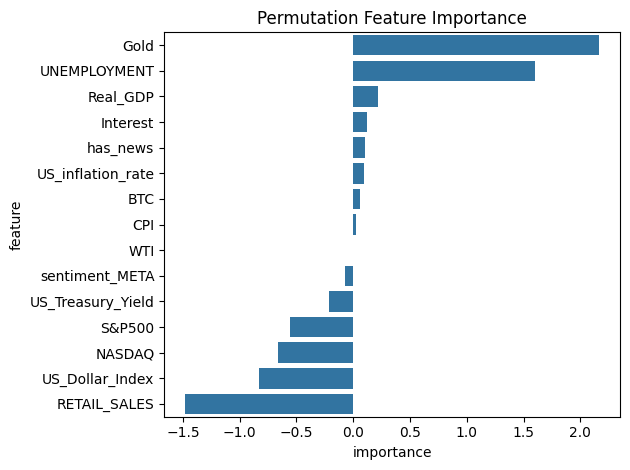

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7da070a58040>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
               feature  importance
 13               Gold    2.166398
 2        UNEMPLOYMENT    1.601877
 7            Real_GDP    0.216181
 1            Interest    0.122334
 14           has_news    0.101664
 6   US_inflation_rate    0.092403
 12                BTC    0.061982
 3                 CPI    0.023588
 11                WTI   -0.003681
 0      sentiment_META   -0.069203
 4   US_Treasury_Yield   -0.216908
 9              S&P500   -0.557929
 10             NASDAQ   -0.662262
 8     US_Dollar_Index   -0.832935
 5        RETAIL_SALES   -1.482771)

In [ ]:
model_GRU(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META',
    feature_names= X_META.columns)

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9429
MSE Train:       18.9411
RMSE Train:      4.3521
MAE Train:       3.5281
MAPE Train:      0.0208
-----------------------------


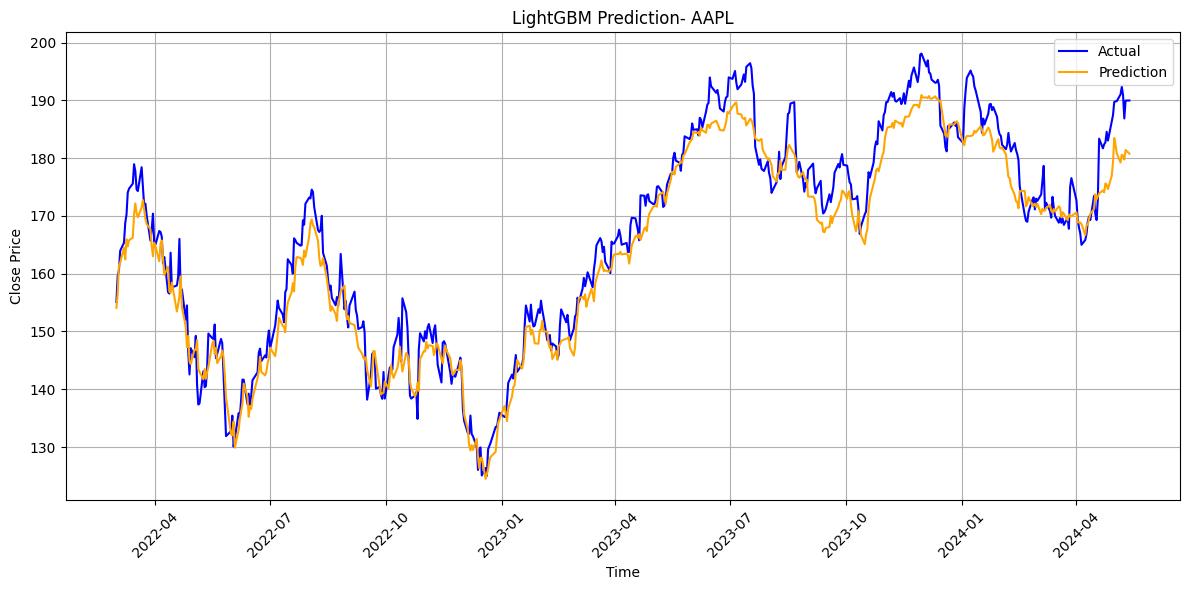

-----------------------------
Test
R2 Value Test:  -22.8192
MSE Test:       2913.1630
RMSE Test:      53.9737
MAE Test:       52.8068
MAPE Test:      0.2280
-----------------------------


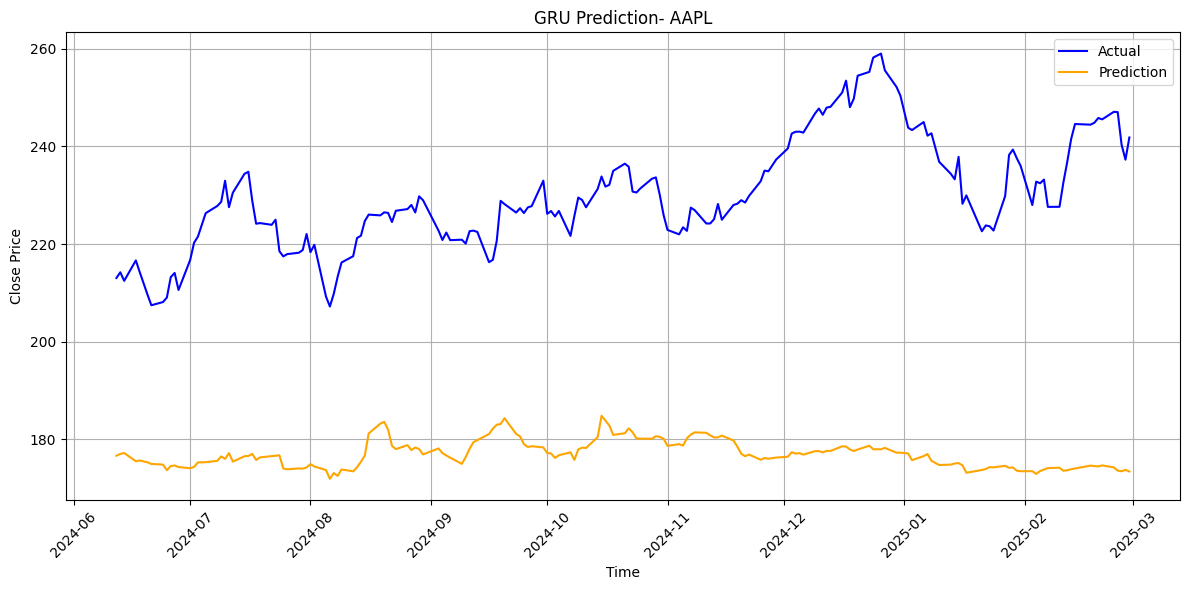

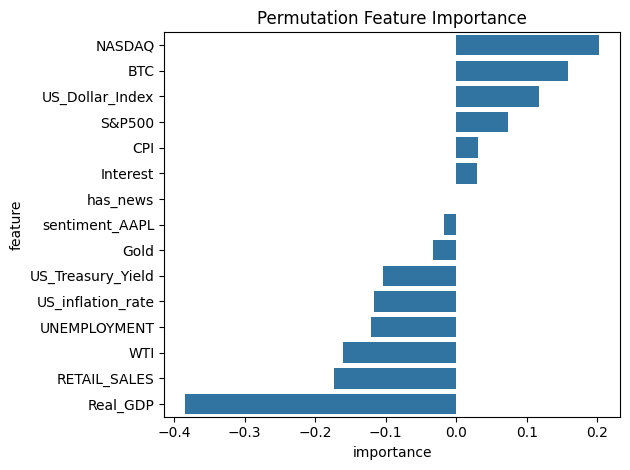

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7da07033bb00>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=250
 ),
               feature  importance
 10             NASDAQ    0.202689
 12                BTC    0.158183
 8     US_Dollar_Index    0.117537
 9              S&P500    0.073714
 3                 CPI    0.030654
 1            Interest    0.028770
 14           has_news    0.000000
 0      sentiment_AAPL   -0.017043
 13               Gold   -0.032982
 4   US_Treasury_Yield   -0.103692
 6   US_inflation_rate   -0.116348
 2        UNEMPLOYMENT   -0.120601
 11                WTI   -0.160817
 5        RETAIL_SALES   -0.173565
 7            Real_GDP   -0.384619)

In [ ]:
model_GRU(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 250,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL',
    feature_names= X_AAPL.columns)

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9838
MSE Train:       58.7741
RMSE Train:      7.6664
MAE Train:       6.1755
MAPE Train:      0.0198
-----------------------------


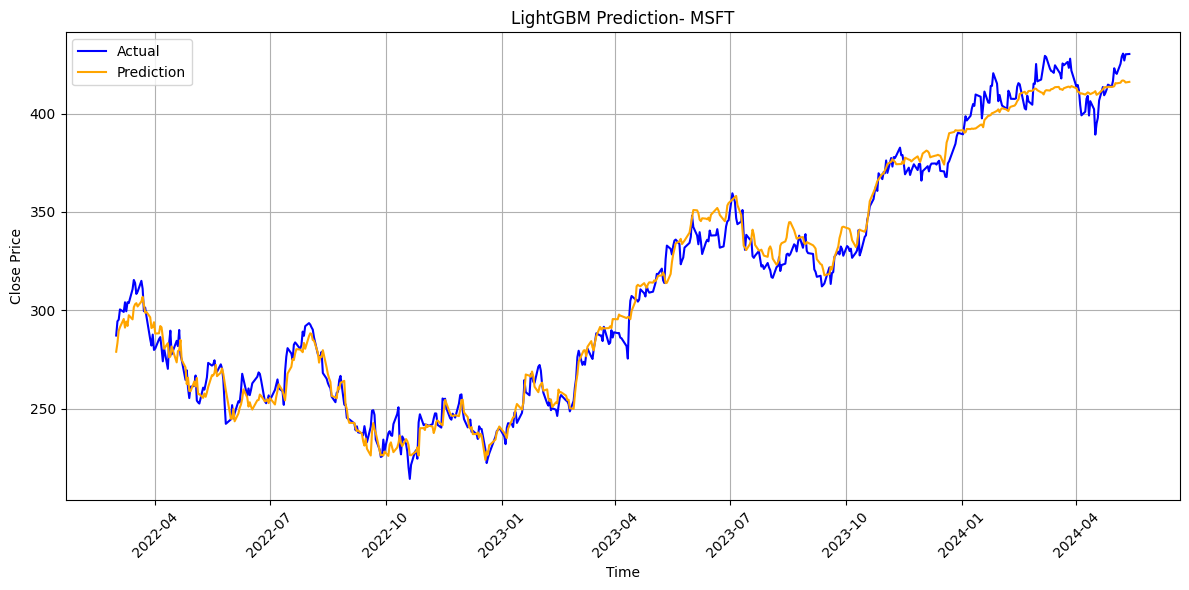

-----------------------------
Test
R2 Value Test:  -0.1432
MSE Test:       289.8992
RMSE Test:      17.0264
MAE Test:       13.1344
MAPE Test:      0.0304
-----------------------------


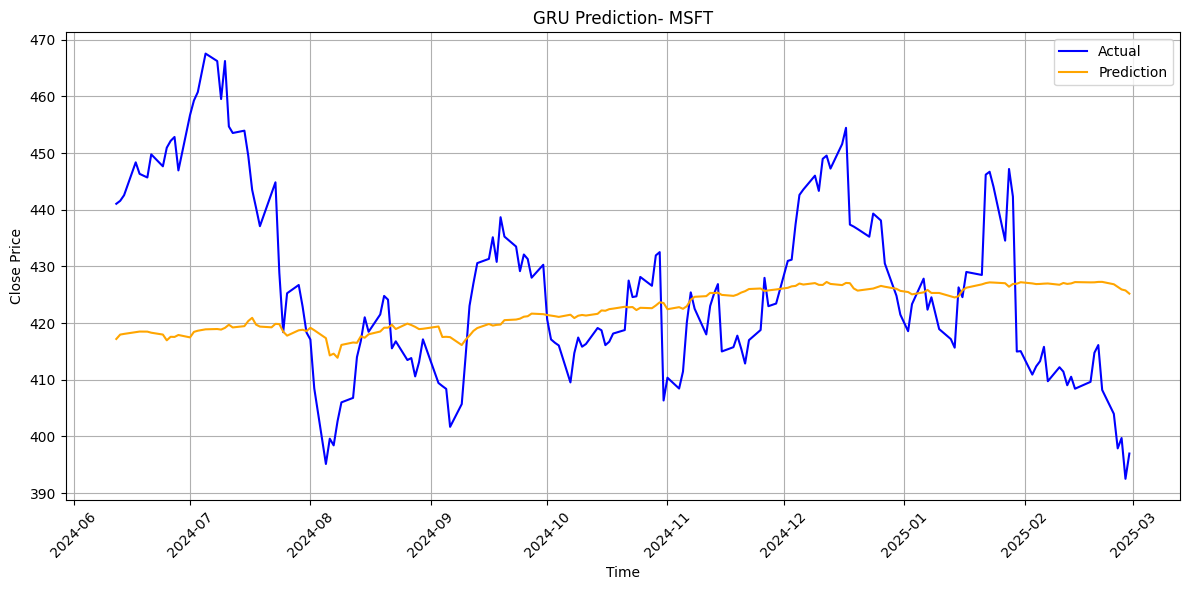

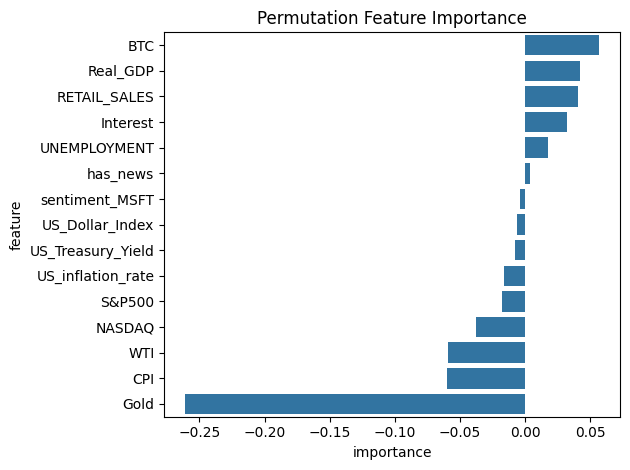

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7da0809fdd00>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 12                BTC    0.056857
 7            Real_GDP    0.042320
 5        RETAIL_SALES    0.040851
 1            Interest    0.031781
 2        UNEMPLOYMENT    0.017859
 14           has_news    0.003881
 0      sentiment_MSFT   -0.003818
 8     US_Dollar_Index   -0.005907
 4   US_Treasury_Yield   -0.007473
 6   US_inflation_rate   -0.016234
 9              S&P500   -0.018050
 10             NASDAQ   -0.037624
 11                WTI   -0.059340
 3                 CPI   -0.059692
 13               Gold   -0.261098)

In [ ]:
model_GRU(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'Nadam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT',
    feature_names= X_MSFT.columns)

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9924
MSE Train:       4.3417
RMSE Train:      2.0837
MAE Train:       1.4431
MAPE Train:      0.0414
-----------------------------


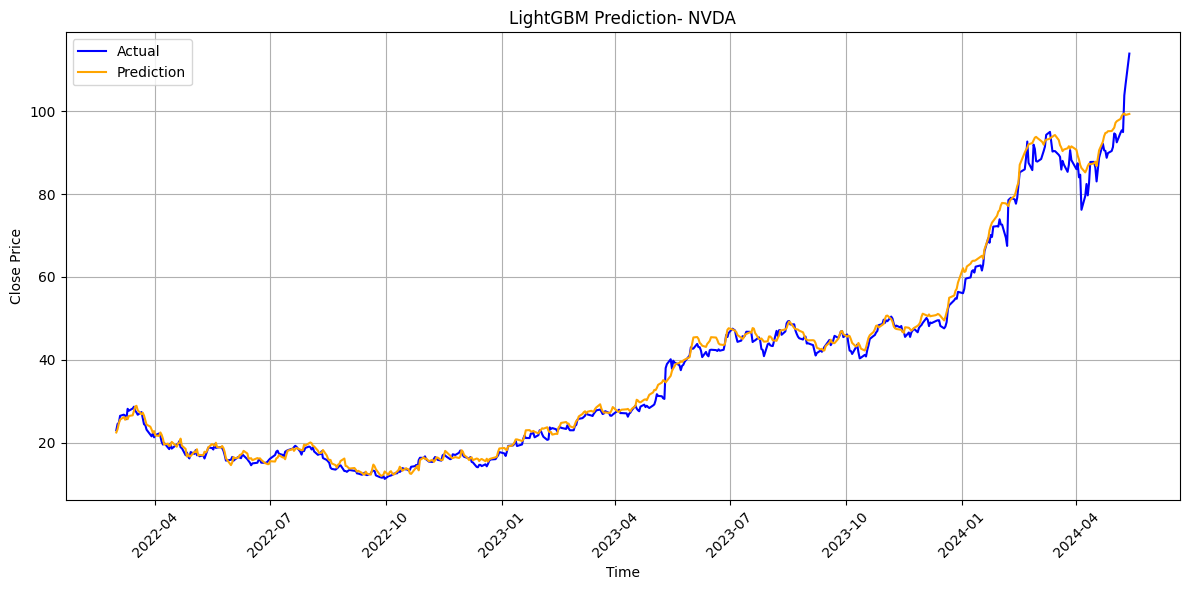

-----------------------------
Test
R2 Value Test:  -3.6279
MSE Test:       616.5548
RMSE Test:      24.8305
MAE Test:       23.1482
MAPE Test:      0.1748
-----------------------------


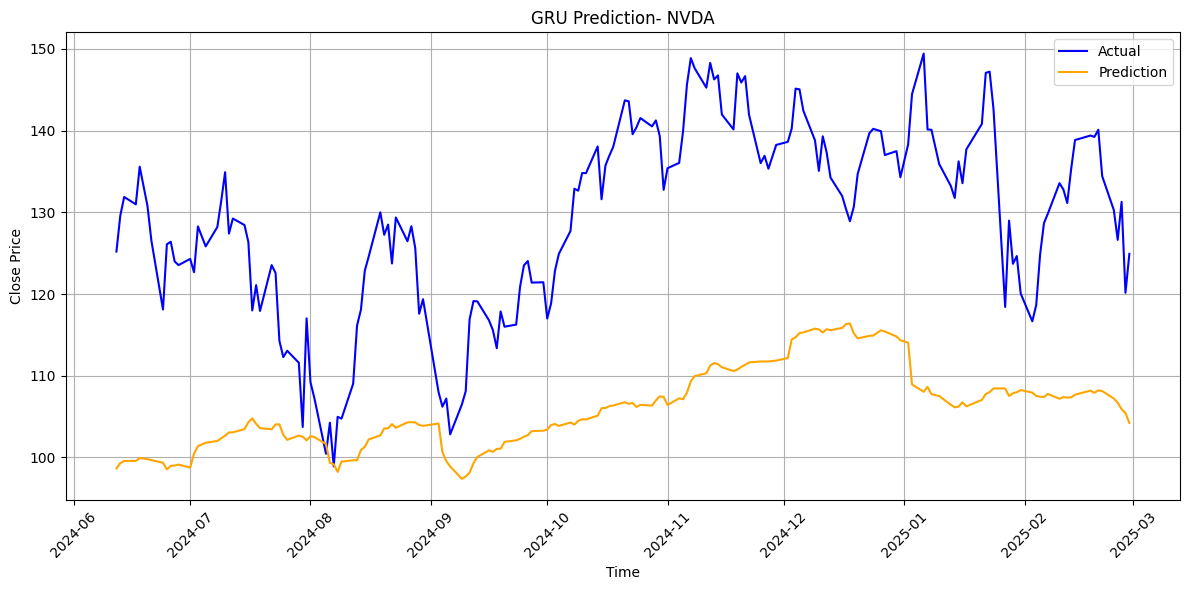

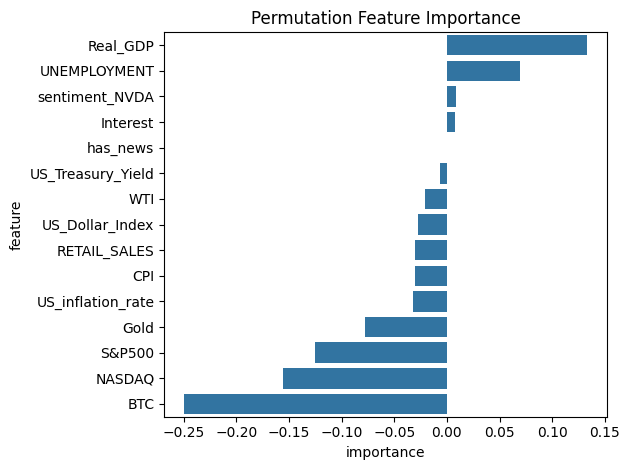

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7da0682740e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 7            Real_GDP    0.132936
 2        UNEMPLOYMENT    0.069582
 0      sentiment_NVDA    0.008425
 1            Interest    0.007338
 14           has_news    0.000000
 4   US_Treasury_Yield   -0.006961
 11                WTI   -0.021187
 8     US_Dollar_Index   -0.027370
 5        RETAIL_SALES   -0.029795
 3                 CPI   -0.030384
 6   US_inflation_rate   -0.032073
 13               Gold   -0.077690
 9              S&P500   -0.125310
 10             NASDAQ   -0.155451
 12                BTC   -0.249273)

In [ ]:
model_GRU(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'AdamW',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA',
    feature_names= X_NVDA.columns)

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9666
MSE Train:       14.4329
RMSE Train:      3.7991
MAE Train:       3.0517
MAPE Train:      0.0251
-----------------------------


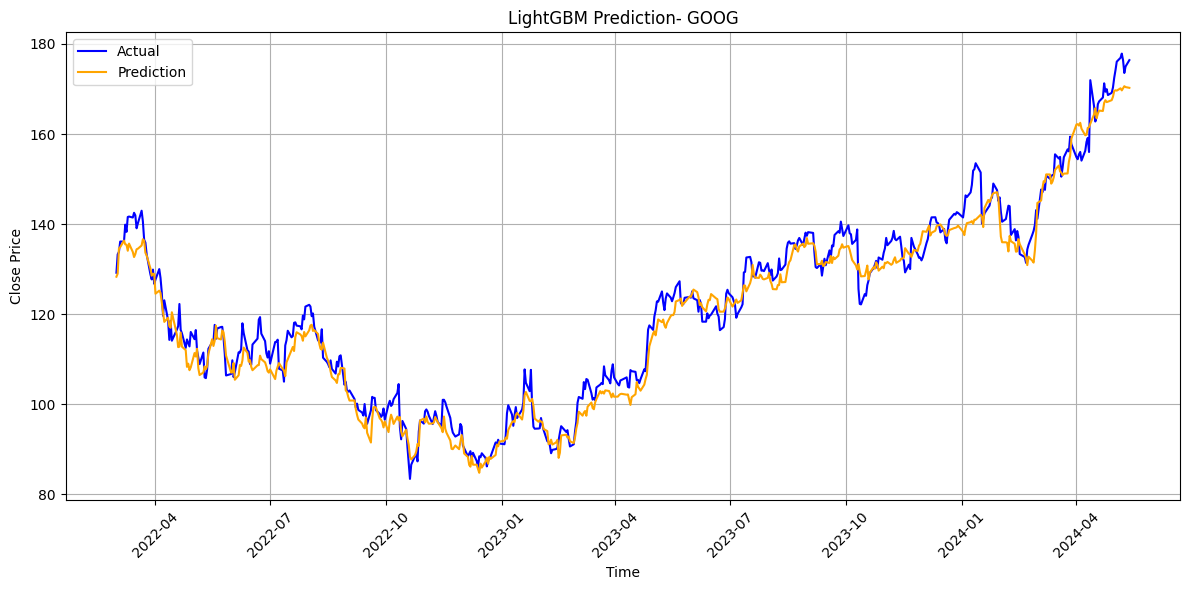

-----------------------------
Test
R2 Value Test:  0.0151
MSE Test:       168.7152
RMSE Test:      12.9890
MAE Test:       11.6317
MAPE Test:      0.0678
-----------------------------


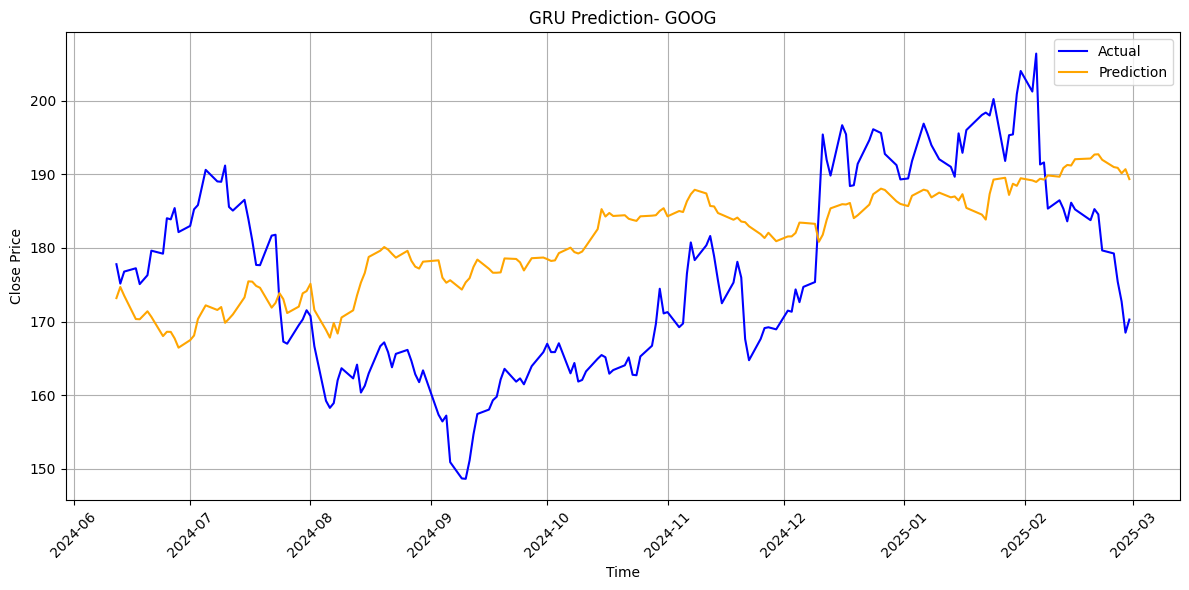

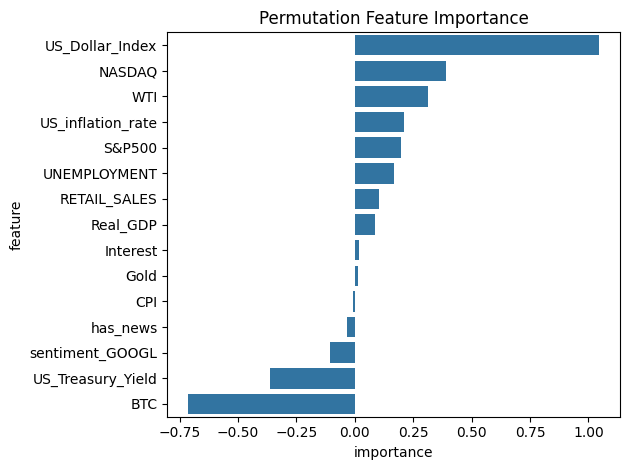

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x7da0687efc40>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 8     US_Dollar_Index    1.047461
 10             NASDAQ    0.389507
 11                WTI    0.311593
 6   US_inflation_rate    0.212782
 9              S&P500    0.198320
 2        UNEMPLOYMENT    0.167418
 5        RETAIL_SALES    0.103721
 7            Real_GDP    0.087102
 1            Interest    0.019670
 13               Gold    0.013403
 3                 CPI   -0.006391
 14           has_news   -0.031229
 0     sentiment_GOOGL   -0.104864
 4   US_Treasury_Yield   -0.362541
 12                BTC   -0.714585)

In [ ]:
model_GRU(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'RMSprop',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG',
    feature_names= X_GOOG.columns)

#LSTM

In [ ]:
def model_LSTM(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, feature_names, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(LSTM(128, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE Test:      {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LSTM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

    from IPython.display import display
    display(eli5.show_weights(perm, feature_names=list(feature_names)))

    return model

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9938
MSE Train:       84.3064
RMSE Train:      9.1819
MAE Train:       6.7653
MAPE Train:      0.0282
-----------------------------


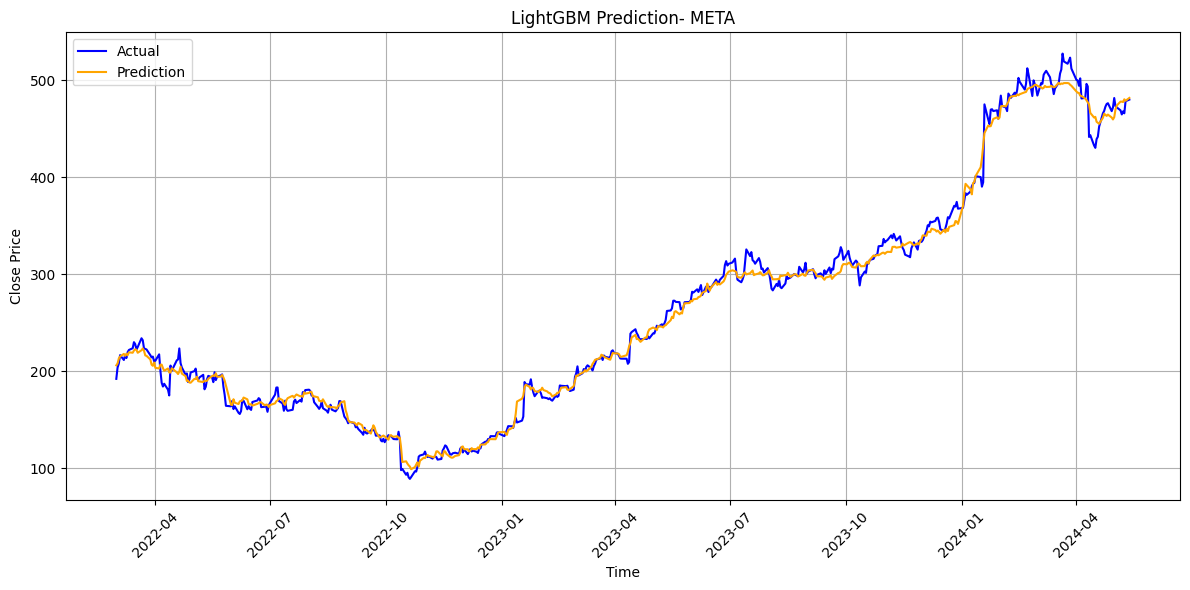

-----------------------------
Test
R2 Value Test:  -3.0106
MSE Test:       17118.9109
RMSE Test:      130.8393
MAE Test:       99.2184
MAPE Test:      0.1600
-----------------------------


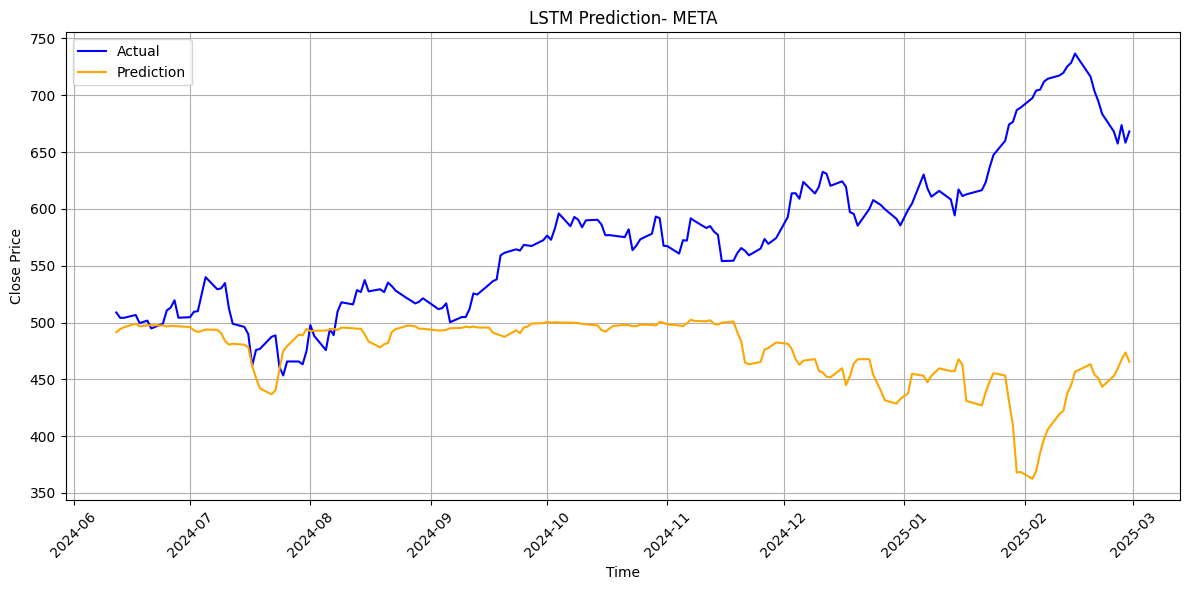

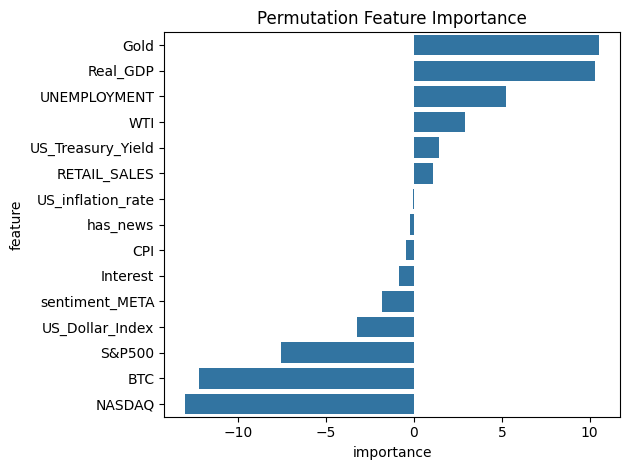

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7da0666300e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 13               Gold   10.542377
 7            Real_GDP   10.320146
 2        UNEMPLOYMENT    5.227193
 11                WTI    2.883541
 4   US_Treasury_Yield    1.409608
 5        RETAIL_SALES    1.107924
 6   US_inflation_rate   -0.039228
 14           has_news   -0.192834
 3                 CPI   -0.473323
 1            Interest   -0.839481
 0      sentiment_META   -1.821977
 8     US_Dollar_Index   -3.230460
 9              S&P500   -7.581601
 12                BTC  -12.204331
 10             NASDAQ  -13.022734)

In [ ]:
model_LSTM(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'Nadam',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META',
    feature_names= X_META.columns)

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9603
MSE Train:       13.1715
RMSE Train:      3.6292
MAE Train:       2.8066
MAPE Train:      0.0170
-----------------------------


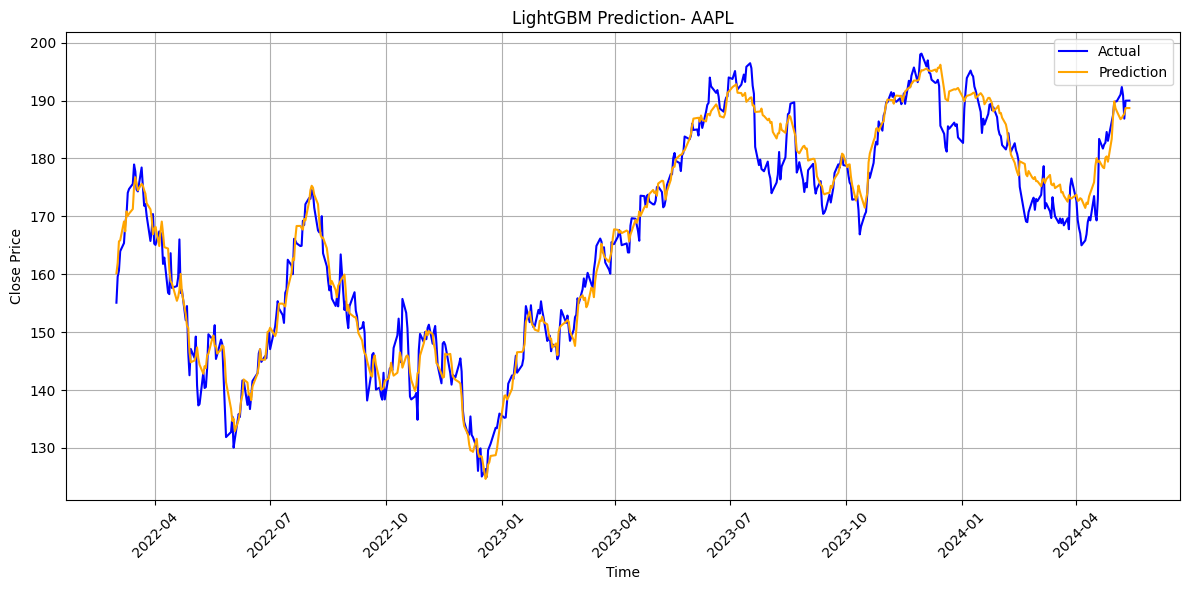

-----------------------------
Test
R2 Value Test:  -20.3564
MSE Test:       2611.9513
RMSE Test:      51.1073
MAE Test:       48.9581
MAPE Test:      0.2109
-----------------------------


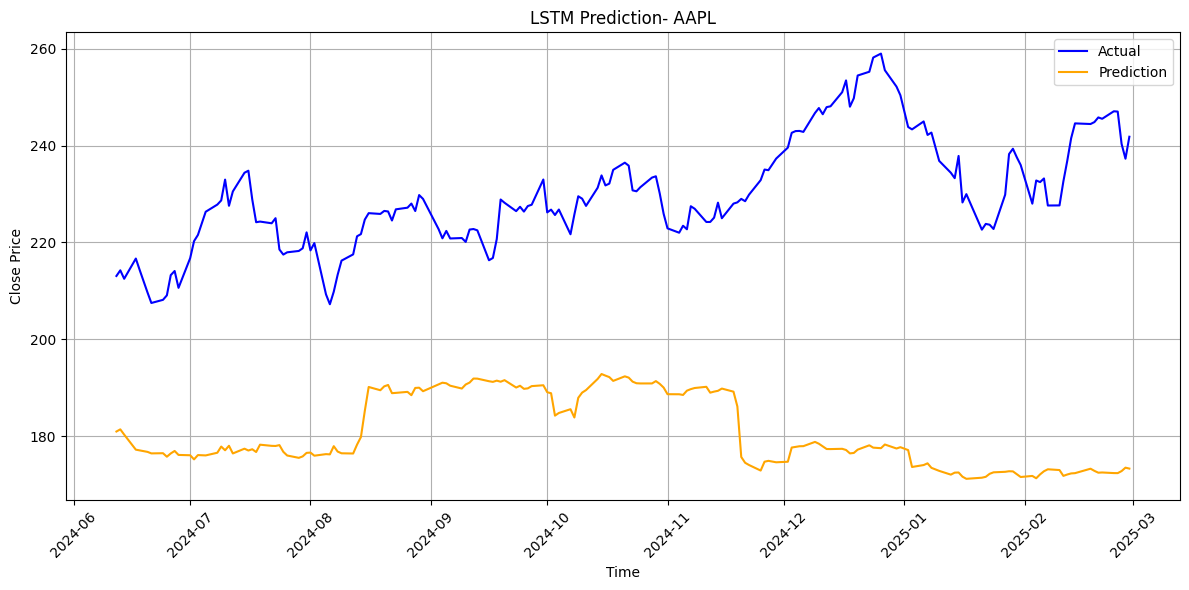

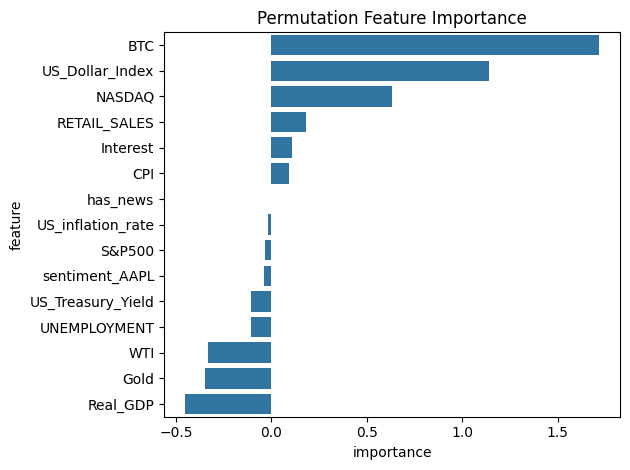

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7da081d459e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 12                BTC    1.717529
 8     US_Dollar_Index    1.137721
 10             NASDAQ    0.630776
 5        RETAIL_SALES    0.184067
 1            Interest    0.110553
 3                 CPI    0.091326
 14           has_news    0.000000
 6   US_inflation_rate   -0.015487
 9              S&P500   -0.031276
 0      sentiment_AAPL   -0.037341
 4   US_Treasury_Yield   -0.105990
 2        UNEMPLOYMENT   -0.108472
 11                WTI   -0.334259
 13               Gold   -0.347245
 7            Real_GDP   -0.452852)

In [ ]:
model_LSTM(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'Adam',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL',
    feature_names= X_AAPL.columns)

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9734
MSE Train:       96.7011
RMSE Train:      9.8337
MAE Train:       8.0387
MAPE Train:      0.0276
-----------------------------


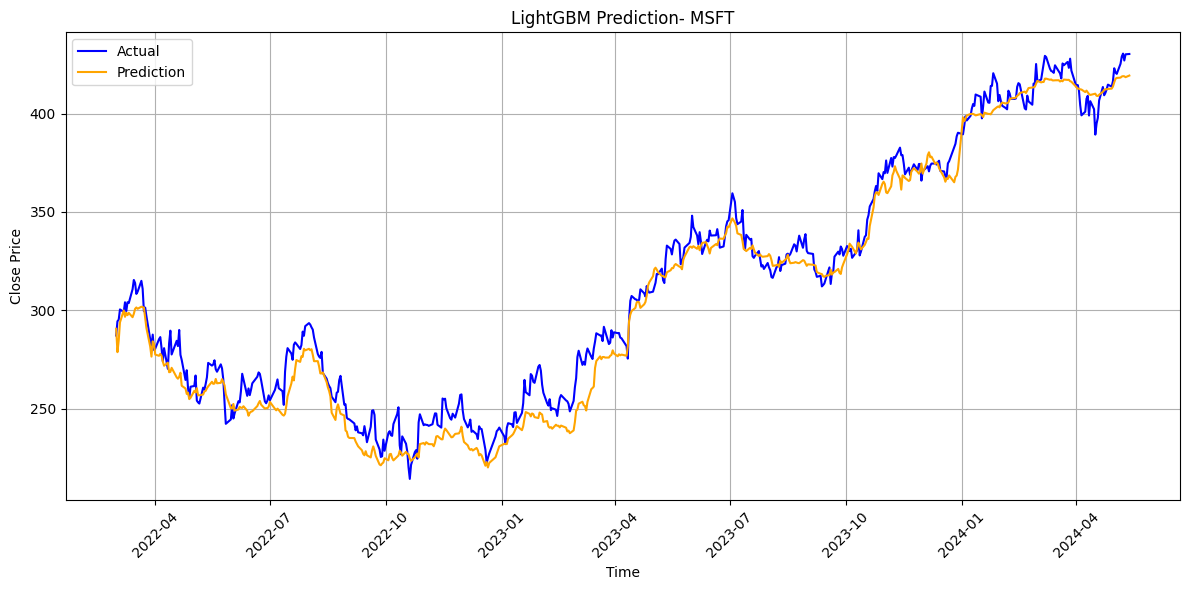

-----------------------------
Test
R2 Value Test:  -0.0519
MSE Test:       266.7502
RMSE Test:      16.3325
MAE Test:       12.4384
MAPE Test:      0.0287
-----------------------------


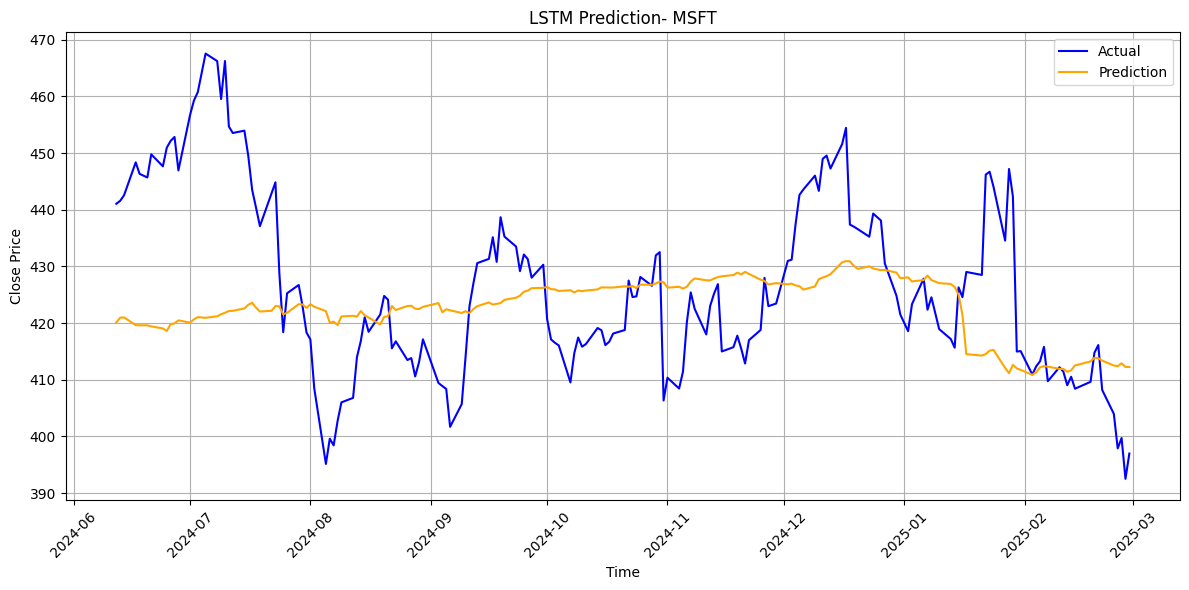

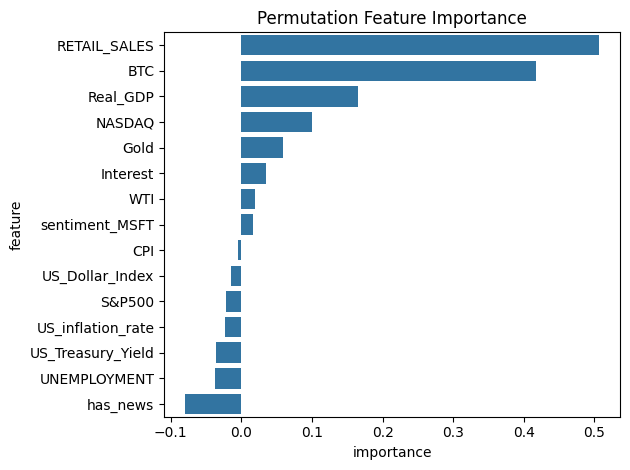

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7da070634a40>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 5        RETAIL_SALES    0.506976
 12                BTC    0.416996
 7            Real_GDP    0.165602
 10             NASDAQ    0.099985
 13               Gold    0.059278
 1            Interest    0.034483
 11                WTI    0.019678
 0      sentiment_MSFT    0.016244
 3                 CPI   -0.004852
 8     US_Dollar_Index   -0.014183
 9              S&P500   -0.022478
 6   US_inflation_rate   -0.023838
 4   US_Treasury_Yield   -0.035462
 2        UNEMPLOYMENT   -0.037780
 14           has_news   -0.080067)

In [ ]:
model_LSTM(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'RMSprop',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT',
    feature_names= X_MSFT.columns)

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9928
MSE Train:       4.1205
RMSE Train:      2.0299
MAE Train:       1.3106
MAPE Train:      0.0388
-----------------------------


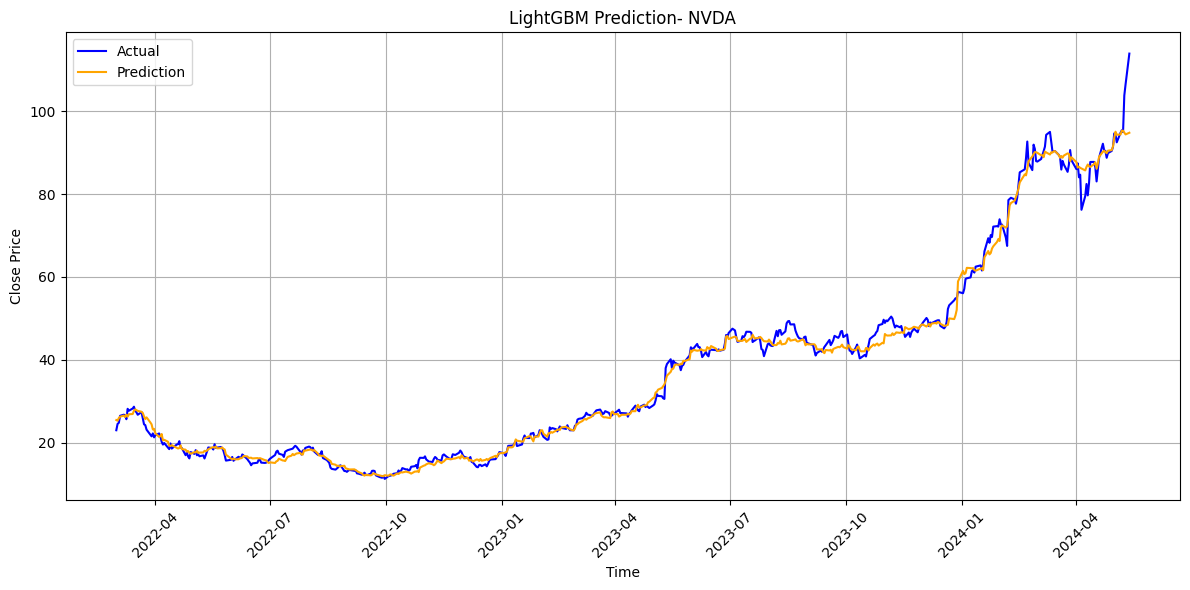

-----------------------------
Test
R2 Value Test:  -5.8955
MSE Test:       918.6597
RMSE Test:      30.3094
MAE Test:       28.7698
MAPE Test:      0.2181
-----------------------------


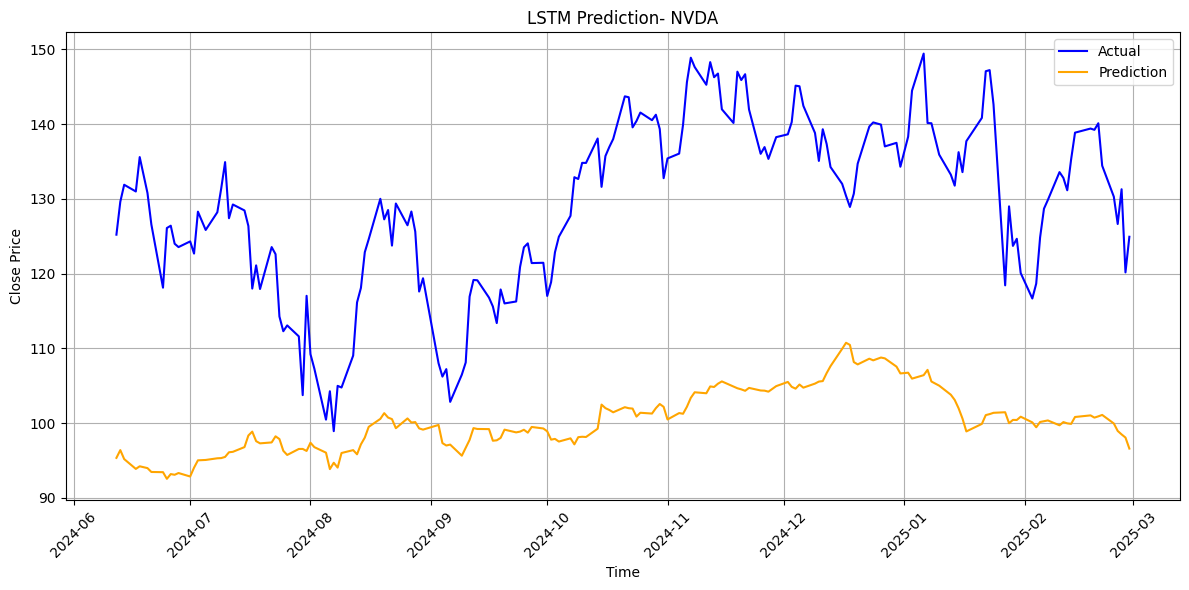

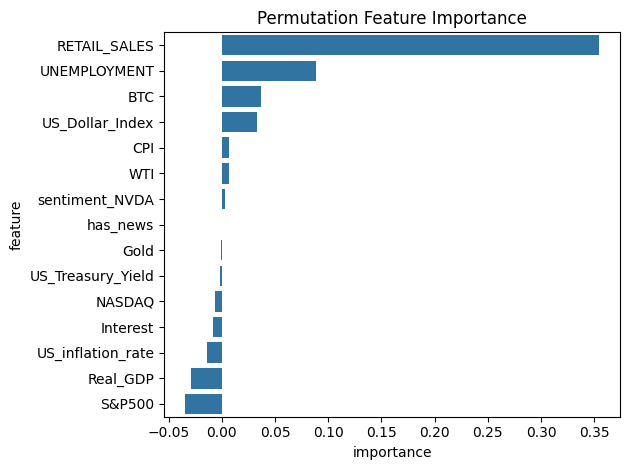

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7da065e9eac0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=250
 ),
               feature  importance
 5        RETAIL_SALES    0.354766
 2        UNEMPLOYMENT    0.088192
 12                BTC    0.036840
 8     US_Dollar_Index    0.033384
 3                 CPI    0.006933
 11                WTI    0.006419
 0      sentiment_NVDA    0.002741
 14           has_news    0.000000
 13               Gold   -0.001242
 4   US_Treasury_Yield   -0.001667
 10             NASDAQ   -0.006358
 1            Interest   -0.008625
 6   US_inflation_rate   -0.013549
 7            Real_GDP   -0.029039
 9              S&P500   -0.034816)

In [ ]:
model_LSTM(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 250,
    optimizer = 'Adam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA',
    feature_names= X_NVDA.columns)

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9350
MSE Train:       28.0971
RMSE Train:      5.3007
MAE Train:       4.4508
MAPE Train:      0.0361
-----------------------------


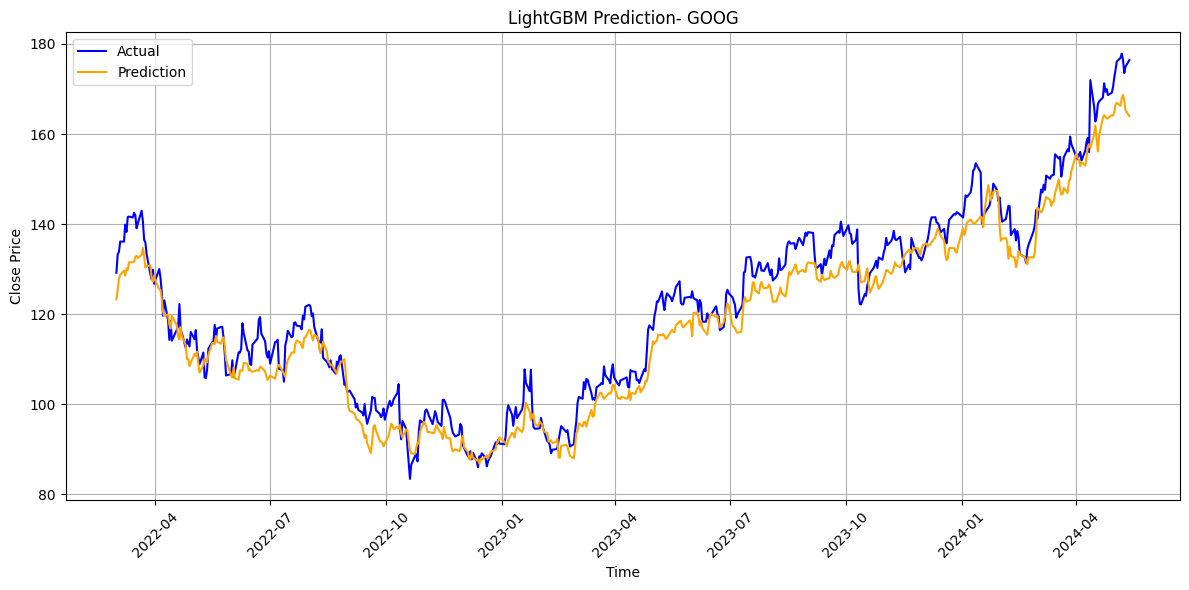

-----------------------------
Test
R2 Value Test:  0.1093
MSE Test:       152.5873
RMSE Test:      12.3526
MAE Test:       10.4994
MAPE Test:      0.0598
-----------------------------


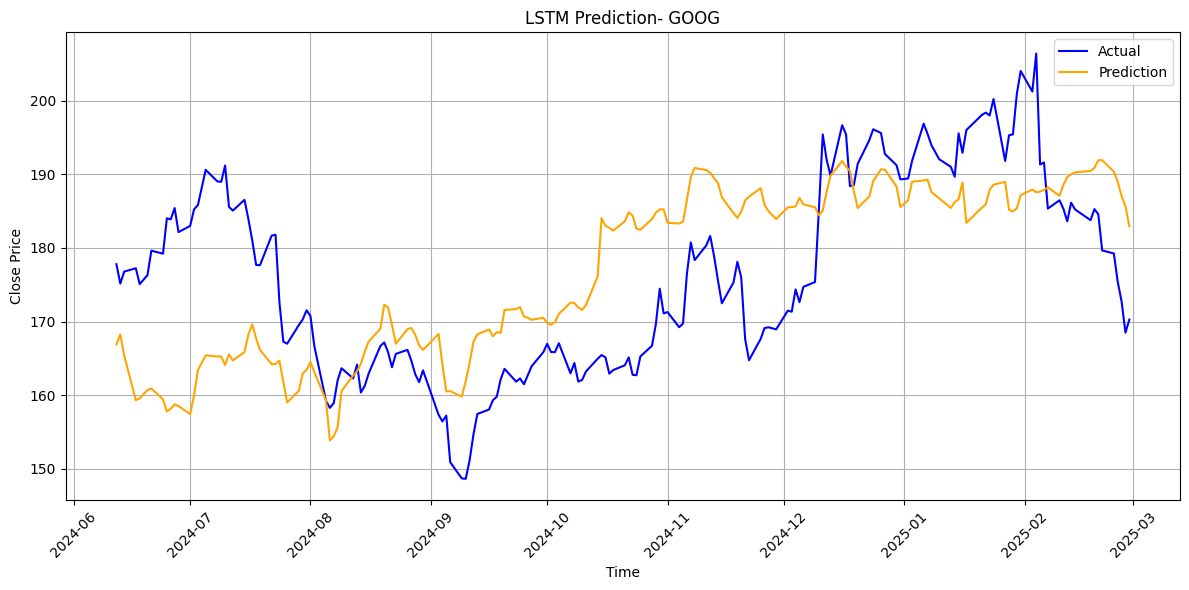

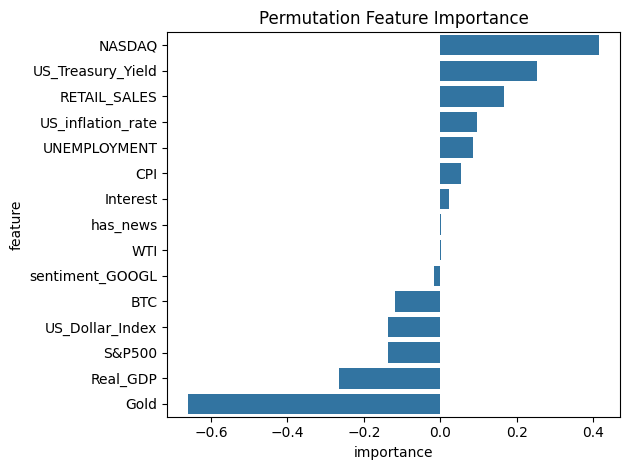

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x7da062ee0f40>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=300
 ),
               feature  importance
 10             NASDAQ    0.416747
 4   US_Treasury_Yield    0.252335
 5        RETAIL_SALES    0.166228
 6   US_inflation_rate    0.096513
 2        UNEMPLOYMENT    0.086754
 3                 CPI    0.053038
 1            Interest    0.022510
 14           has_news    0.003145
 11                WTI    0.002089
 0     sentiment_GOOGL   -0.015368
 12                BTC   -0.118647
 8     US_Dollar_Index   -0.135509
 9              S&P500   -0.137778
 7            Real_GDP   -0.264494
 13               Gold   -0.660798)

In [ ]:
model_LSTM(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 300,
    optimizer = 'AdamW',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG',
    feature_names= X_GOOG.columns)